# Liver Disease Prediction


## Abstract 

According to recent trends there has been an enormous upscale in liver diseases primarily due to unhealthy lifestyle and practices. This project aims at analyzing the Indian liver patient dataset using various classification models in order to effectively predict the presence or absence of the liver disease thereby helping to identify the liver disease at a preliminary stage. Dataset is obtained from UCI machine learning repository. Different attributes of blood tests are analyzed and its linked to the presence or absence of liver disease. The main attributes of liver disease includes gender, age, total bilirubin, direct bilirubin, alkaline, alkphos, A/G ratio, total protein, albumin and globulin ratio. Comparative analysis of various classification models such as Logistic regression, Support Vector Machine, Naïve Bayes, K-Nearest Neighbor, Decision Tree, Random Forest Tree, Neural Networks and Ensemble method is used and accuracy of each model is measured. Based on the analysis most efficient model is used to create a web application for predicting the disease for users.


# Problem Statement

Liver is an important organ of human body which is located in the upper part of abdomen region and is essentially used for controlling the chemical levels in blood. Liver breaks down toxic substances and they are excreted into bile or blood. [1] Liver disease also known as hepatic disease is any disturbance which causes abnormal liver functioning and thereby failing to perform the designated functions. Three quarters of liver tissue has to be damaged for decrease in function hence early detection of the presence of the disease help to reduce the intensity of the disease and reduce the damage caused to liver. [2] Commonly observed liver disorders include fatty liver, hepatitis, liver cirrhosis and liver cancer. 

##### Data Description – 
Data used for the predictive analysis is Indian Liver Patient Dataset (ILPD) which is obtained from UCI Machine Learning Repository. The data set is collected from Andhra Pradesh, India. ILPD consists of details of 583 Indian patients in which 416 affected by liver disease and 167 non liver patients. 

The main vision of this project is to compare various machine learning algorithms performance in diagnosis of liver disease and analyze their performance with respect to various metrics such as accuracy, recall, precision, f-measure and ROC curve.


# Objectives

##### Data Visualization - 
	Performing exploratory data analysis on data which includes univariate, bivariate and multivariate visualization techniques.
##### Data Preprocessing - 
	Converting imbalanced data in balanced data.
	Applying regularization to avoid over-fitting or under-fitting issues.
	Imputation of missing values.
	Detection of outliers and treating the outliers.
##### Feature Selection – 
##### Model Selection –
	Hyper tuning the parameters to obtain better accuracy.
##### Performance Metrics Analysis -  
	Accuracy
	Precision
	Recall
	F1 measure
	ROC curve
##### Analyzing which resampling techniques produces better performance for selected models.






In [1]:
import pandas as pd
import numpy as  np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
#import mglearn
#from fancyimpute import KNN
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE,ADASYN,BorderlineSMOTE,SVMSMOTE,KMeansSMOTE
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [2]:
data=pd.read_csv('C:\\Users\\Maria\\Desktop\\indian_liver_patient.csv')
data.shape

(583, 11)

In [3]:
data.rename(columns={'Unnamed: 10':'Output'},inplace=True)

#No of liver patients-
print('Liver Disease Patients - ',sum(data['Output']==1))

#Not liver patient
print('Non Liver Disease Patients - ',sum(data['Output']==2))


data['Output']=data['Output'].replace(2,0)

Liver Disease Patients -  416
Non Liver Disease Patients -  167


In [4]:
import plotly.express as px
df = data
fig = px.histogram(df, x="Output",color="Output", marginal="rug",)
fig.show()

In [5]:
data.head(10)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   
5   46    Male              1.8               0.7                   208   
6   26  Female              0.9               0.2                   154   
7   29  Female              0.9               0.3                   202   
8   17    Male              0.9               0.3                   202   
9   55    Male              0.7               0.2                   290   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   
5                        19                          14             7.6   
6                        16                          12             7.0   
7                        14                          11             6.7   
8                        22                          19             7.4   
9                        53                          58             6.8   

   Albumin  Albumin_and_Globulin_Ratio  Output  
0      3.3                        0.90       1  
1      3.2                        0.74       1  
2      3.3                        0.89       1  
3      3.4                        1.00       1  
4      2.4                        0.40       1  
5      4.4                        1.30       1  
6      3.5                        1.00       1  
7      3.6                        1.10       1  
8      4.1                        1.20       0  
9      3.4                        1.00       1

# Label Encoding is performed on Categorical Feature - Gender

In [6]:

# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
data['Gender']= le.fit_transform(data['Gender']) 

In [7]:
data.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       0              0.7               0.1                   187   
1   62       1             10.9               5.5                   699   
2   62       1              7.3               4.1                   490   
3   58       1              1.0               0.4                   182   
4   72       1              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Output  
0      3.3                        0.90       1  
1      3.2                        0.74       1  
2      3.3                        0.89       1  
3      3.4                        1.00       1  
4      2.4                        0.40       1

# Imputation
To replace empty values rather than deleting the useful data.

### Imputation using median values 

In [8]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
print('Before Imputation - ')
print(data.isnull().sum())
imputer.fit(data)
data=imputer.transform(data)
data=pd.DataFrame(data)
data=data.rename(columns={0:'Age',1:'Gender',2:'Total_Bilirubin',3:'Direct_Bilirubin',4:'Alkaline_Phosphotase ',5:'Alamine_Aminotransferase',6:'Aspartate_Aminotransferase',7:'Total_Proteins',8:'Albumin',9:'Albumin_and_Globulin_Ratio ',10:'Output'})
print('\n\nAfter Imputation - ')
print(data.isnull().sum())


Before Imputation - 
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Output                        0
dtype: int64


After Imputation - 
Age                            0
Gender                         0
Total_Bilirubin                0
Direct_Bilirubin               0
Alkaline_Phosphotase           0
Alamine_Aminotransferase       0
Aspartate_Aminotransferase     0
Total_Proteins                 0
Albumin                        0
Albumin_and_Globulin_Ratio     0
Output                         0
dtype: int64


# Statistical Analysis of ILPD

In [9]:
data.describe()

Age      Gender  Total_Bilirubin  Direct_Bilirubin  \
count  583.000000  583.000000       583.000000        583.000000   
mean    44.746141    0.756432         3.298799          1.486106   
std     16.189833    0.429603         6.209522          2.808498   
min      4.000000    0.000000         0.400000          0.100000   
25%     33.000000    1.000000         0.800000          0.200000   
50%     45.000000    1.000000         1.000000          0.300000   
75%     58.000000    1.000000         2.600000          1.300000   
max     90.000000    1.000000        75.000000         19.700000   

       Alkaline_Phosphotase   Alamine_Aminotransferase  \
count             583.000000                583.000000   
mean              290.576329                 80.713551   
std               242.937989                182.620356   
min                63.000000                 10.000000   
25%               175.500000                 23.000000   
50%               208.000000                 35.000000   
75%               298.000000                 60.500000   
max              2110.000000               2000.000000   

       Aspartate_Aminotransferase  Total_Proteins     Albumin  \
count                  583.000000      583.000000  583.000000   
mean                   109.910806        6.483190    3.141852   
std                    288.918529        1.085451    0.795519   
min                     10.000000        2.700000    0.900000   
25%                     25.000000        5.800000    2.600000   
50%                     42.000000        6.600000    3.100000   
75%                     87.000000        7.200000    3.800000   
max                   4929.000000        9.600000    5.500000   

       Albumin_and_Globulin_Ratio       Output  
count                   583.000000  583.000000  
mean                      0.946947    0.713551  
std                       0.318495    0.452490  
min                       0.300000    0.000000  
25%                       0.700000    0.000000  
50%                       0.930000    1.000000  
75%                       1.100000    1.000000  
max                       2.800000    1.000000

# Histogram View of the Data

In [10]:
df = data
fig = px.histogram(df, x="Gender", color="Output", marginal="rug", 
                         )
fig.show()

In [11]:
df = data
fig = px.histogram(df, x="Age", color="Output", marginal="rug",nbins=20)
fig.show()

In [12]:
df = data
fig = px.histogram(df, x="Total_Bilirubin", color="Output", marginal="rug",nbins=20)
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.9)
fig.show()

In [13]:
df = data
fig = px.histogram(df, x="Direct_Bilirubin", color="Output", marginal="rug",nbins=20)
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.9)
fig.show()

In [14]:
df = data
fig = px.histogram(df, x="Total_Proteins", color="Output", marginal="rug",nbins=20)
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.9)
fig.show()

In [15]:
df = data
fig = px.histogram(df, x="Albumin", color="Output", marginal="rug",nbins=20)
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.9)
fig.show()

In [16]:
df = data
fig = px.histogram(df, x="Albumin_and_Globulin_Ratio ", color="Output", marginal="rug",nbins=20)
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.9)
fig.show()

In [17]:
df = data
fig = px.histogram(df, x="Alkaline_Phosphotase ", color="Output", marginal="rug",nbins=20)
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.9)
fig.show()

In [18]:
df = data
fig = px.histogram(df, x="Alamine_Aminotransferase", color="Output", marginal="rug",nbins=20)
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.9)
fig.show()

# Feature Correlation 

Correlated features will not always worsen your model, but they will not always improve it either.
-> Make the learning algorithm faster
-> Decrease harmful bias
-> Interpretability of your model (Occam's razor)

Text(0.5, 1.0, 'Correlation between features')

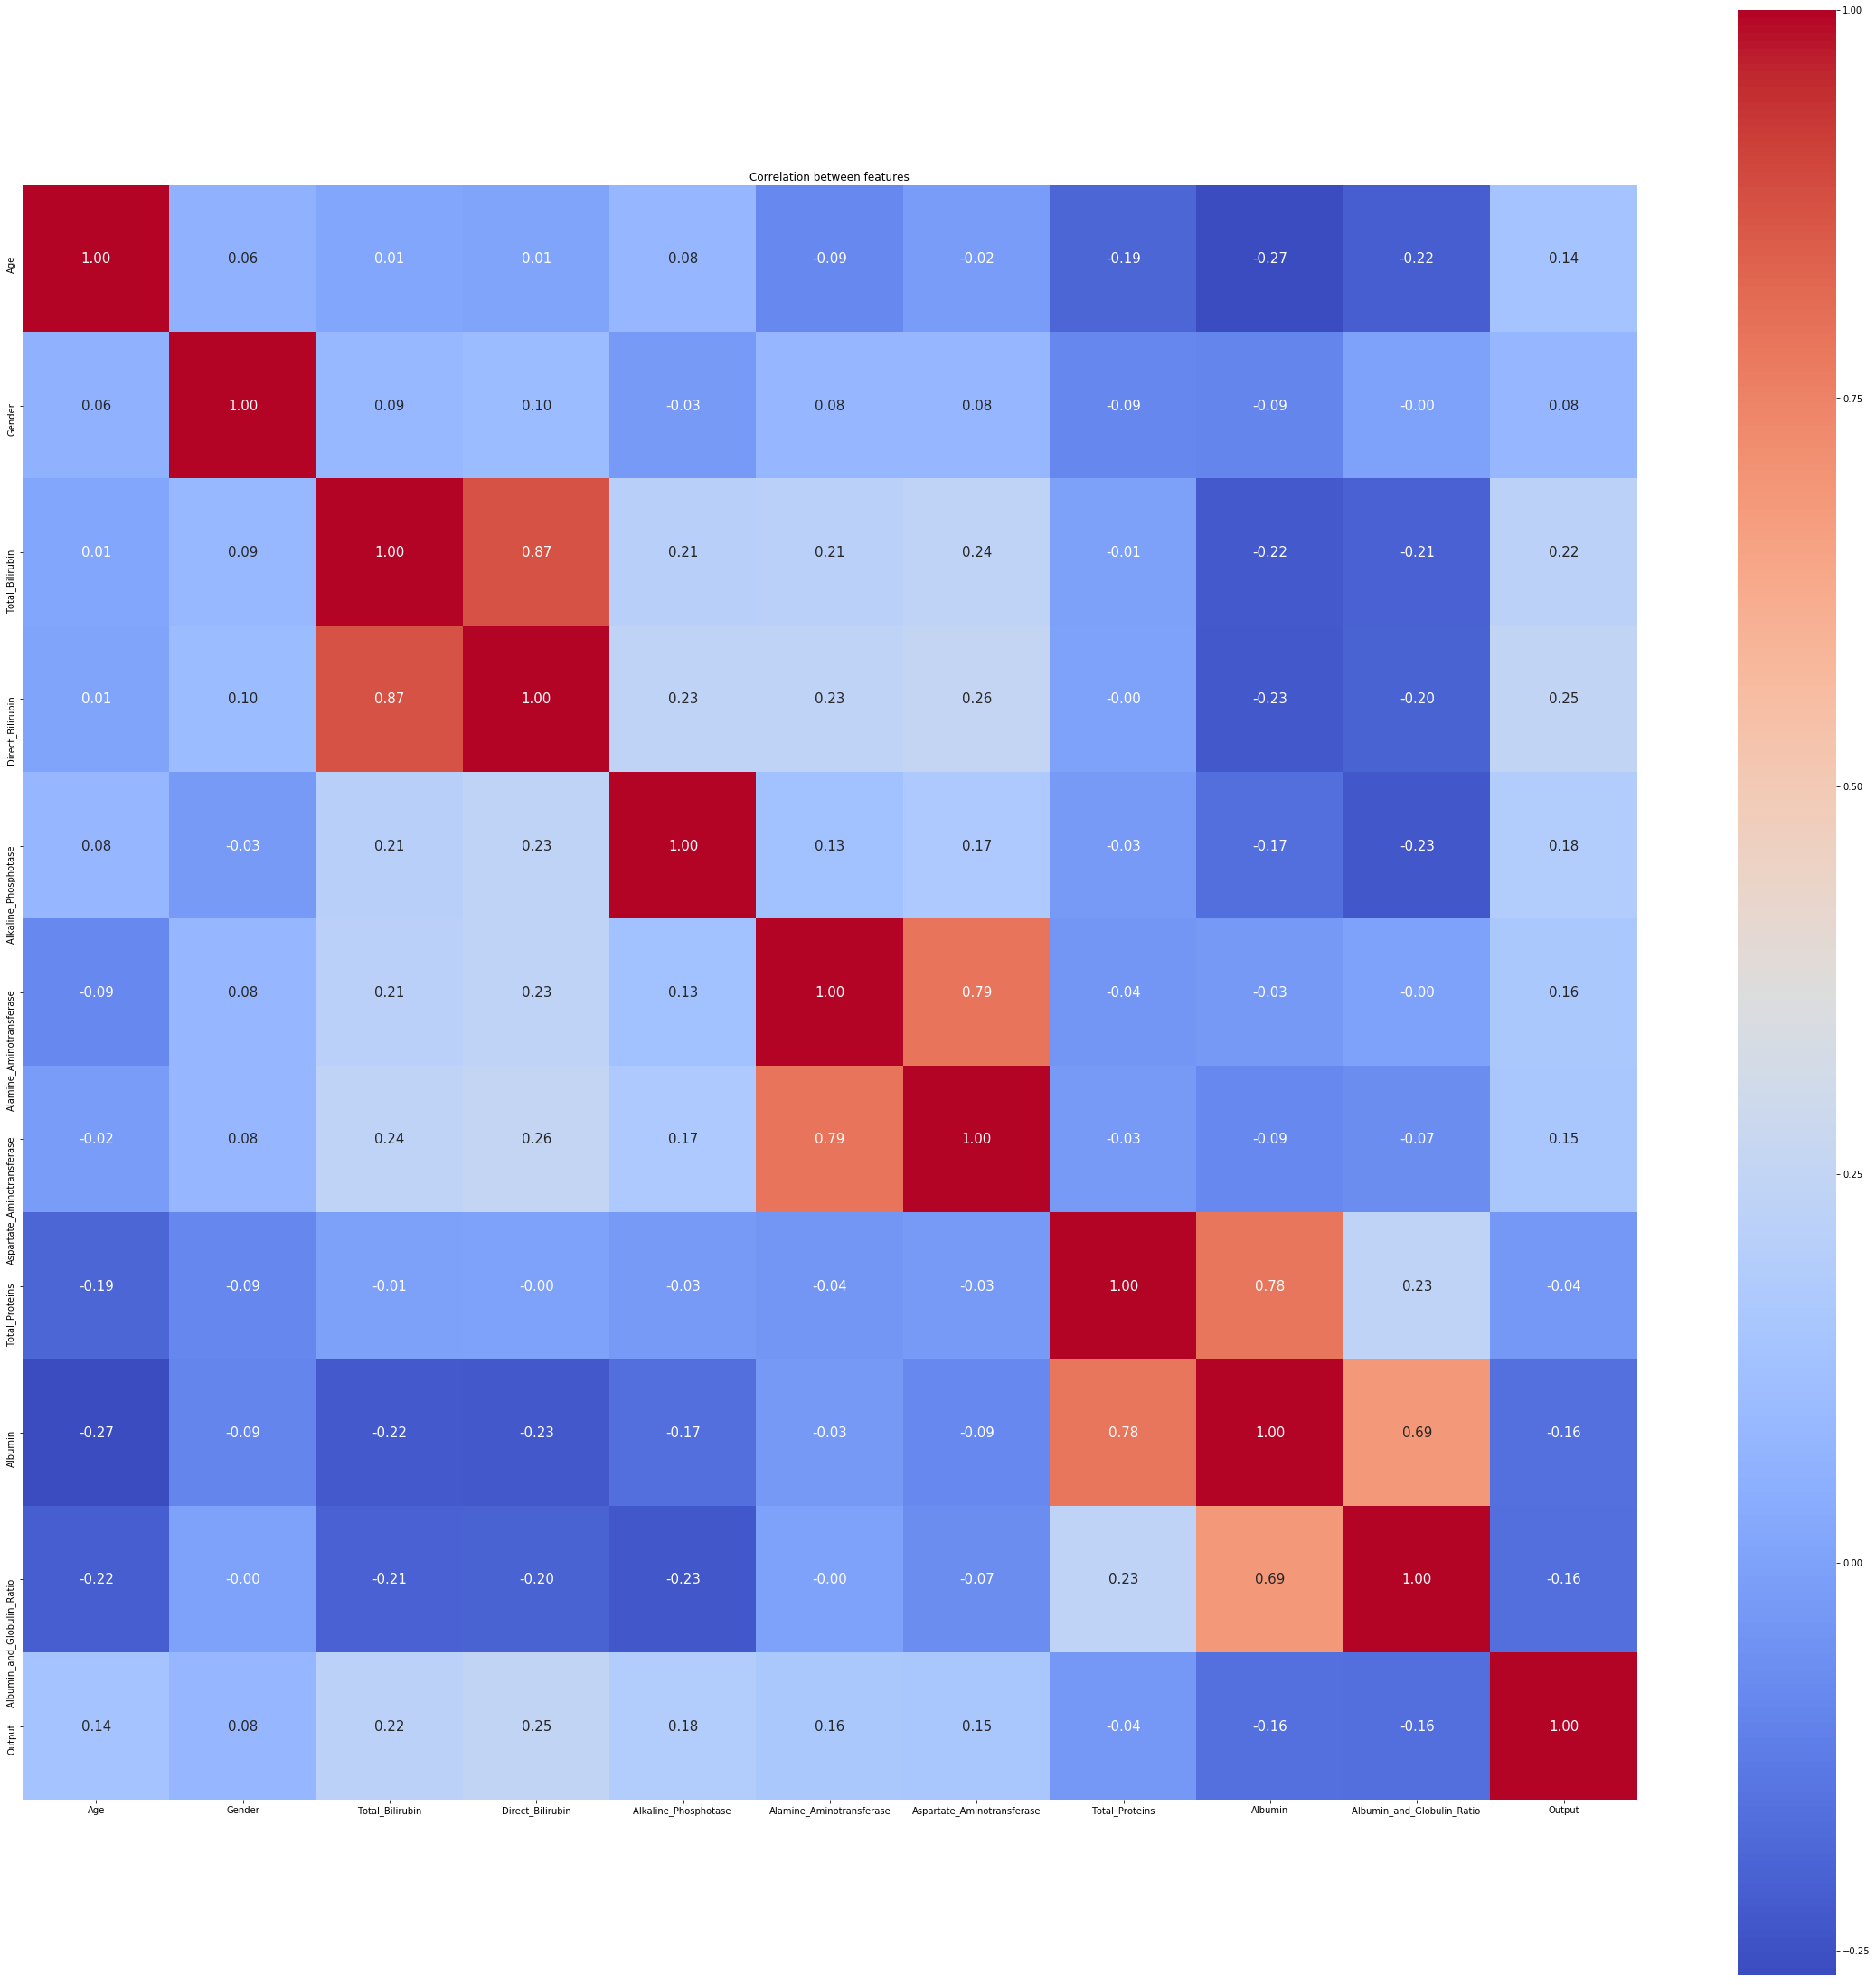

In [19]:
correlation=data.corr()

plt.figure(figsize=(40, 40))
sns.heatmap(correlation, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features')

# Eliminating dupilcates

In [20]:
data = data.drop_duplicates()
print(data.shape)

(570, 11)


In [21]:
y=data['Output']
#data=data.drop(['Gender','SGPT','Alkphos'],axis=1)
x=data.drop(['Output'],axis=1)
x.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase   \
0  65.0     0.0              0.7               0.1                  187.0   
1  62.0     1.0             10.9               5.5                  699.0   
2  62.0     1.0              7.3               4.1                  490.0   
3  58.0     1.0              1.0               0.4                  182.0   
4  72.0     1.0              3.9               2.0                  195.0   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Proteins  \
0                      16.0                        18.0             6.8   
1                      64.0                       100.0             7.5   
2                      60.0                        68.0             7.0   
3                      14.0                        20.0             6.8   
4                      27.0                        59.0             7.3   

   Albumin  Albumin_and_Globulin_Ratio   
0      3.3                         0.90  
1      3.2                         0.74  
2      3.3                         0.89  
3      3.4                         1.00  
4      2.4                         0.40

# Imbalanced data

We can notice the data is highly imbalanced it contains majority of patients suffering from disease and minority contaning patients not suffering from liver disease. This leads to poor machine learning experience and the result produced will be biased.
Hence resampling techniques can be used to increase the performance of various metrics.

##  Resampling techniques

### Over-sampling
Technqiue used - SMOTE (Genetic Algorithm Based)



In [22]:
#from imblearn.over_sampling import SMOTE
#ros=SMOTE(random_state=50)
#x_resampled,y_resampled=ros.fit_resample(X,Y)

import smote_variants as sv
oversampler= sv.GASMOTE()

Y=np.array(y)
X=np.array(x)


#oversampler= sv.MulticlassOversampling(sv.SMOTE_PSO())

# X_samp and y_samp contain the oversampled dataset
X_samp, y_samp= oversampler.sample(X, Y)

#y_samp=np.array(y_samp)
#Y=Y.reshape((513,1))
#X_samp=np.array(X_samp)

#X_samp, y_samp= oversampler.sample(X_samp, y_samp)

2020-03-04 12:53:49,009:INFO:GASMOTE: Running sampling via ('GASMOTE', "{'n_neighbors': 5, 'maxn': 7, 'n_pop': 10, 'popl3': 5, 'pm': 0.3, 'pr': 0.2, 'Ge': 10, 'n_jobs': 1, 'random_state': None}")


In [23]:

print('Before resampling (Features) - ',X.shape)
print('Before resampling (Target) - ',Y.shape)
print('After resampling (Features) - ',X_samp.shape)
print('After resampling (Target) - ',y_samp.shape)

Before resampling (Features) -  (570, 10)
Before resampling (Target) -  (570,)
After resampling (Features) -  (1050, 10)
After resampling (Target) -  (1050,)


In [24]:
x1=X_samp
y1=y_samp

xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.20,random_state=50)

# Outlier Detection and Scaling

# Boxplot before outlier removal

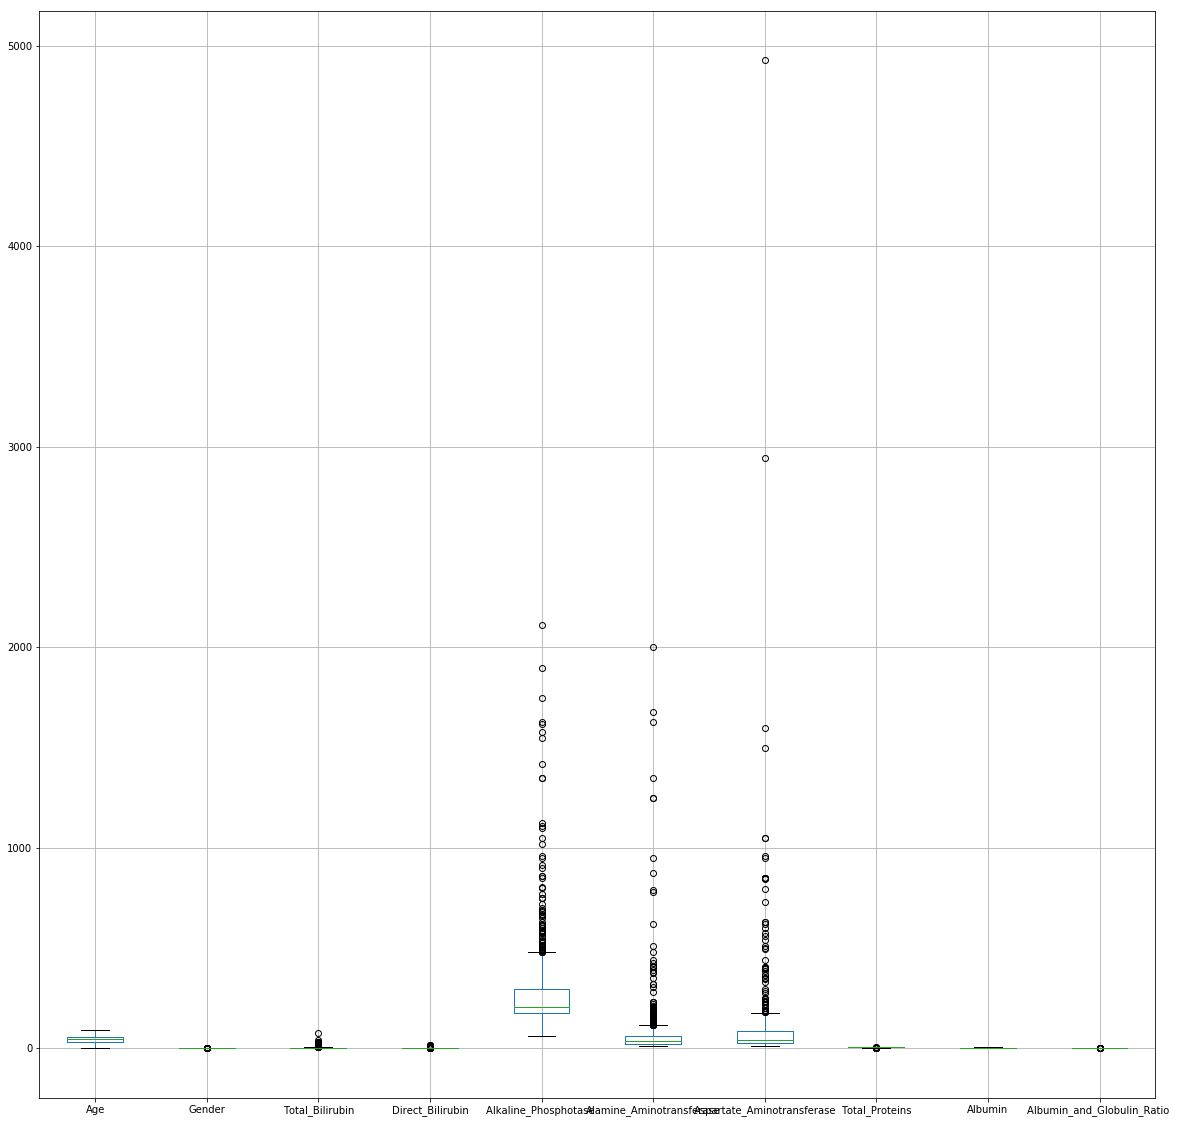

In [25]:
plt.figure(figsize=(20,20))
x.boxplot()

# Isolation forest

In [44]:
x=pd.DataFrame(X_samp)
y=pd.DataFrame(y_samp)

In [44]:

from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(n_estimators=300, contamination=0.20)
iso_forest = iso_forest.fit(x)
isof_outliers = iso_forest.predict(x)
isoF_outliers_values = x[iso_forest.predict(x) == -1]
print(isoF_outliers_values)

              0         1          2         3           4           5  \
1     62.000000  1.000000  10.900000  5.500000  699.000000   64.000000   
2     62.000000  1.000000   7.300000  4.100000  490.000000   60.000000   
4     72.000000  1.000000   3.900000  2.000000  195.000000   27.000000   
13    74.000000  0.000000   1.100000  0.400000  214.000000   22.000000   
16    38.000000  1.000000   1.800000  0.800000  342.000000  168.000000   
...         ...       ...        ...       ...         ...         ...   
970   42.469784  0.281135   0.728114  0.200000  162.313190   23.249081   
971   45.197397  0.000000   0.713160  0.200000  164.723788   21.197397   
973   52.386364  0.369318   0.636932  0.136932  268.153409   25.585227   
1071  53.937484  0.836148   0.794933  0.214696  501.474666   21.310814   
1073  55.126272  0.868278   0.737100  0.192206  501.185501   21.053779   

               6         7         8         9  
1     100.000000  7.500000  3.200000  0.740000  
2      68.000

In [45]:
sum(isof_outliers==-1)

216

In [46]:
x=pd.DataFrame(x)

In [47]:
X = x.drop(isoF_outliers_values.index.values.tolist())

In [48]:
y=pd.DataFrame(y_samp)

In [49]:
Y = y.drop(isoF_outliers_values.index.values.tolist())

In [58]:
X=X.rename({0:'Age',1:'Gender',2:'TotalBilirubin',3:'DirectBilirubin',4:'AlkalinePhosphotase',5:'AlamineAminotransferase',6:'AspartateAminotransferase',7:'TotalProteins',8:'Albumin',9:'AlbuminGlobulinRatio'},axis=1)

In [59]:
#print(x['Total_Bilirubin'].quantile(0.10))
#print(x['Total_Bilirubin'].quantile(0.90))
X['TotalBilirubin'] = np.where(X['TotalBilirubin'] < 0.7, 0.7,X['TotalBilirubin'])
X['TotalBilirubin'] = np.where(X['TotalBilirubin'] >7.91, 7.91,X['TotalBilirubin'])

#print(x['Direct_Bilirubin'].quantile(0.10))
#print(x['Direct_Bilirubin'].quantile(0.90))
#x['Direct_Bilirubin'] = np.where(x['Direct_Bilirubin'] <=0.1, 0.1,x['Direct_Bilirubin'])
#x['Direct_Bilirubin'] = np.where(x['Direct_Bilirubin'] >4.1, 4.1,x['Direct_Bilirubin'])

#print(x['Alkaline_Phosphotase '].quantile(0.10))
#print(x['Alkaline_Phosphotase '].quantile(0.90))
X['AlkalinePhosphotase'] = np.where(X['AlkalinePhosphotase'] <150,150,X['AlkalinePhosphotase'])
X['AlkalinePhosphotase'] = np.where(X['AlkalinePhosphotase'] >515,515,X['AlkalinePhosphotase'])

#print(data['Aspartate_Aminotransferase'].quantile(0.10))
#print(data['Aspartate_Aminotransferase'].quantile(0.90))
X['AspartateAminotransferase'] = np.where(X['AspartateAminotransferase'] <=19,19,X['AspartateAminotransferase'])
X['AspartateAminotransferase'] = np.where(X['AspartateAminotransferase'] >190,190,X['AspartateAminotransferase'])


#print(x['Alamine_Aminotransferase'].quantile(0.10))
#print(x['Alamine_Aminotransferase'].quantile(0.90))
X['AlamineAminotransferase'] = np.where(X['AlamineAminotransferase'] <=17,17,X['AlamineAminotransferase'])
X['AlamineAminotransferase'] = np.where(X['AlamineAminotransferase'] >140,140,X['AlamineAminotransferase'])


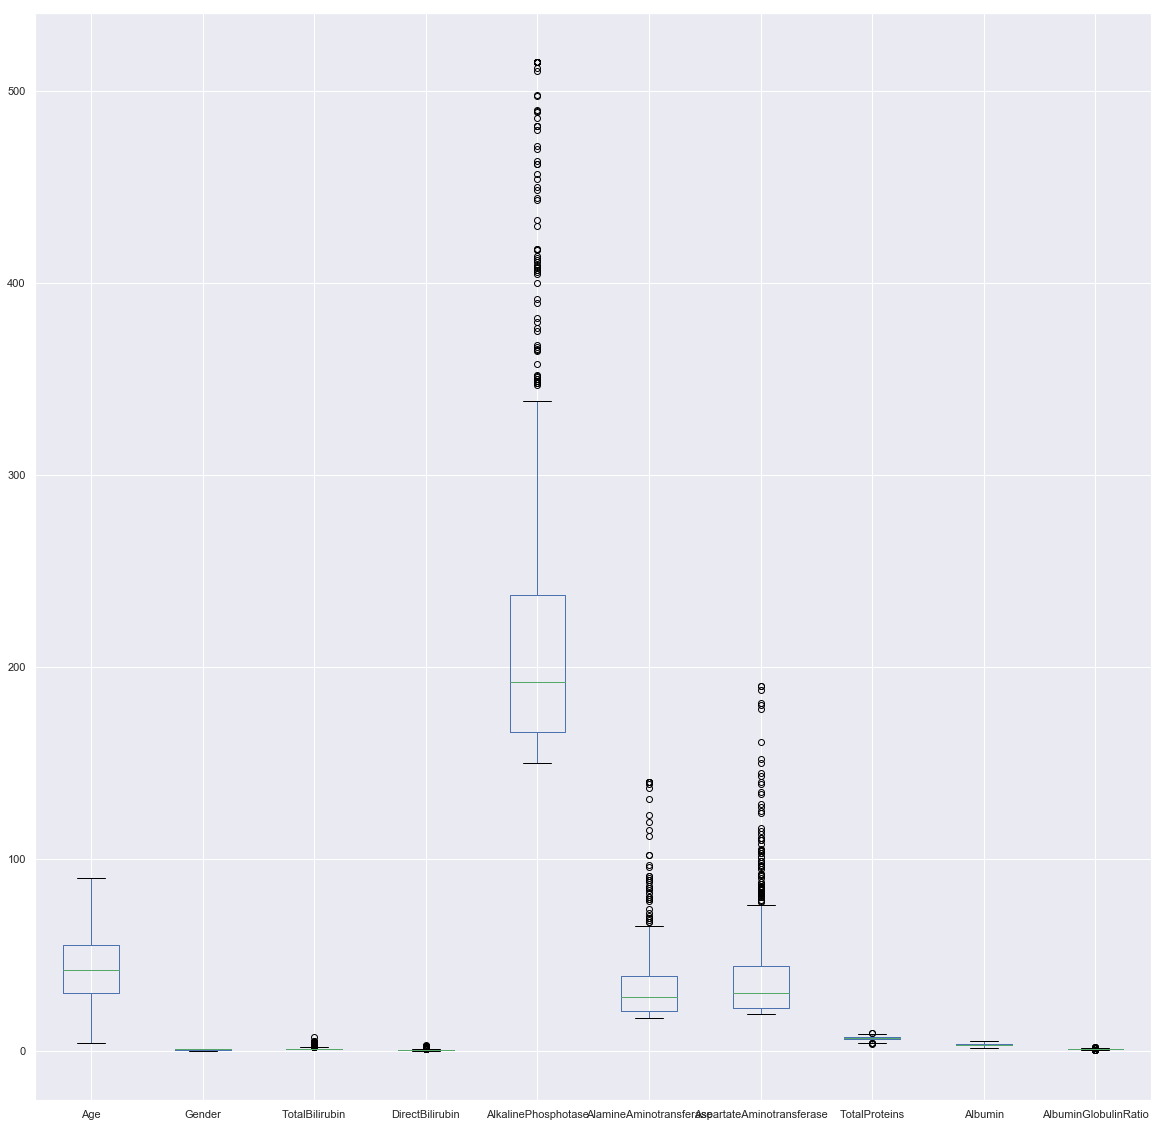

In [60]:
plt.figure(figsize=(20,20))
X.boxplot()

In [61]:
y_samp.shape

(1080,)

In [62]:
X.columns


Index(['Age', 'Gender', 'TotalBilirubin', 'DirectBilirubin',
       'AlkalinePhosphotase', 'AlamineAminotransferase',
       'AspartateAminotransferase', 'TotalProteins', 'Albumin',
       'AlbuminGlobulinRatio'],
      dtype='object')

In [63]:
print(xtrain.shape)
print(ytrain.shape)
print(X_samp.shape)
print(y_samp.shape)

(456, 10)
(456,)
(1080, 10)
(1080,)


In [64]:
y.shape

(1080, 1)

In [65]:
Y=pd.DataFrame(Y)

# Genetic Algorithm

In [67]:
from deap import creator, base, tools, algorithms
import random
import numpy as np
from deap import tools
import pandas as pd
from sklearn.model_selection import cross_val_score

class FeatureSelectionGA:
    """
    FeatureSelectionGA
    This Class uses Genetic Algorithm to find out the best features for the input model using
    Distributed Evolutionary Algorithms in Python(DEAP) package.
    """

    def __init__(self, model, x, y, cv_split=5, random_state=20, n_pop=25, n_gen=25):
        """
            Parameters
            -----------
            model : scikit-learn supported model,
                x :  {array-like}, shape = [n_samples, n_features]
                     Training vectors, where n_samples is the number of samples
                     and n_features is the number of features.
                y  : {array-like}, shape = [n_samples]
                     Target Values
            cv_split: int
                     Number of splits for cross_validation to calculate fitness.
            Random State: As Specified
            n_pop: It will be Identified to determine the Population Size
            n_gen: It would be Identified to determine the Number of Generation
        """
        self.model = model
        self.n_features = x.shape[1]
        self.cv_split = cv_split
        self.x = x
        self.y = y
        self.random_state = random_state
        self.n_pop = n_pop
        self.n_gen = n_gen
        print("The number of Features received by the system is : {}".format(self.n_features))
        print("The Shape of Training Data is : {} and Target Data is : {}".format(self.x.shape, self.y.shape))

        individual = [1 for i in range(x.shape[1])]
        print("Accuracy For All the features: " + str(self.fitness_test(individual)) + "\n")

        # Applying Genetic Algorithm
        hof = self.evolutionary_algorithm()
        accuracy, individual, header = self.bestIndividual(hof)
        print('Best Accuracy: \t' + str(accuracy[0]))
        print('Number of Features in Subset: \t' + str(individual.count(1)))
        print('Feature Subset: ' + str(header)+'\n')
        print('\n\nKindly Create a New Classifier with the Above Feature Set')




    def fitness_test(self, individual):
        """
        The Function Analyses Provides the average Cross Val Score Using All the Features
        :param individual:
        :return: Average Cross Val Score
        """
        if (individual.count(0) != len(individual)):
            # Fetched the Index of the Individual
            cols = [index for index in range(len(individual)) if individual[index] == 0]

            # Fetching Feature Subset
            X_parsed = self.x.drop(self.x.columns[cols], axis=1)
            X_subset = pd.get_dummies(X_parsed)

            # Applying the Classification Algorithm
            classifier = self.model
            cross_v=cross_val_score(classifier, X_subset, self.y, cv=self.cv_split)
            return ((sum(cross_v) / float(len(cross_v))),0)
        else:
            return (0,)

    def evolutionary_algorithm(self):
        """
        Declaring Global Variables for DEAP
        :return:
        """
        # Creating the Individual Using DEAP
        creator.create("FitnessMax", base.Fitness, weights=(1.0,))
        creator.create("Individual", list, fitness=creator.FitnessMax)

        # Creating ToolBox For The DEAP Framework
        toolbox = base.Toolbox()
        toolbox.register("attr_bool", random.randint, 0, 1)
        toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, self.n_features)
        toolbox.register("population", tools.initRepeat, list, toolbox.individual)
        toolbox.register("evaluate", self.fitness_test)
        toolbox.register("mate", tools.cxOnePoint)
        toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
        toolbox.register("select", tools.selTournament, tournsize=3)

        # Initialize Parameters
        pop = toolbox.population(n=self.n_pop)
        hof = tools.HallOfFame(self.n_pop * self.n_gen)
        stats = tools.Statistics(lambda ind: ind.fitness.values)
        stats.register("avg", np.mean)
        stats.register("min", np.min)
        stats.register("max", np.max)

        # Genetic Algorithm
        pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=self.n_gen, stats=stats, halloffame=hof,verbose=True)

        # Return Fall Of Home
        return hof

    def bestIndividual(self, hof):
        """
        Get the best individual
        """
        maxAccurcy = 0.0
        for individual in hof:
            if (individual.fitness.values[0] > maxAccurcy):
                maxAccurcy = individual.fitness.values[0]
                _individual = individual

        _individualHeader = [list(self.x)[i] for i in range(len(_individual)) if _individual[i] == 1]
        return _individual.fitness.values, _individual, _individualHeader

In [68]:
#FeatureSelectionGA 
import xgboost as xgb
model=xgb.XGBClassifier()
model.fit(xtrain,ytrain)
FeatureSelectionGA(model,X,np.ravel(Y,order='C'))

The number of Features received by the system is : 10
The Shape of Training Data is : (861, 10) and Target Data is : (861,)
Accuracy For All the features: (0.7748823766635301, 0)



C:\Users\Maria\Anaconda3\New folder\lib\site-packages\deap\creator.py:141: RuntimeWarning:

A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.

C:\Users\Maria\Anaconda3\New folder\lib\site-packages\deap\creator.py:141: RuntimeWarning:

A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.



gen	nevals	avg     	min     	max     
0  	25    	0.762005	0.724862	0.784171
1  	12    	0.772841	0.744657	0.792365
2  	11    	0.783179	0.77249 	0.792365
3  	12    	0.78787 	0.769102	0.794677
4  	13    	0.790356	0.77497 	0.794677
5  	15    	0.787528	0.7574  	0.794677
6  	9     	0.790735	0.769082	0.794677
7  	20    	0.791844	0.764451	0.794677
8  	13    	0.794629	0.792365	0.795806
9  	15    	0.792813	0.769082	0.795806
10 	12    	0.79434 	0.783082	0.795806
11 	16    	0.793906	0.776005	0.795806
12 	21    	0.795204	0.783008	0.795806
13 	9     	0.794694	0.776106	0.795806
14 	17    	0.795198	0.780616	0.795806
15 	18    	0.795344	0.792318	0.798125
16 	16    	0.795944	0.792318	0.798125
17 	14    	0.79515 	0.7656  	0.798125
18 	17    	0.795849	0.776005	0.798125
19 	16    	0.794922	0.764478	0.798125
20 	18    	0.798125	0.798125	0.798125
21 	16    	0.795248	0.77257 	0.798125
22 	13    	0.798124	0.798105	0.798125
23 	18    	0.794646	0.77257 	0.798125
24 	18    	0.796775	0.77257 	0.798125
25 	15    	0

In [69]:
X.columns

Index(['Age', 'Gender', 'TotalBilirubin', 'DirectBilirubin',
       'AlkalinePhosphotase', 'AlamineAminotransferase',
       'AspartateAminotransferase', 'TotalProteins', 'Albumin',
       'AlbuminGlobulinRatio'],
      dtype='object')

In [70]:
X=X.drop(['TotalBilirubin','TotalProteins','AlkalinePhosphotase'],axis=1)

In [71]:
X.columns


Index(['Age', 'Gender', 'DirectBilirubin', 'AlamineAminotransferase',
       'AspartateAminotransferase', 'Albumin', 'AlbuminGlobulinRatio'],
      dtype='object')

In [72]:
X_samp=pd.DataFrame(X)

In [73]:
X.columns

Index(['Age', 'Gender', 'DirectBilirubin', 'AlamineAminotransferase',
       'AspartateAminotransferase', 'Albumin', 'AlbuminGlobulinRatio'],
      dtype='object')

In [74]:
X.head()

Age  Gender  DirectBilirubin  AlamineAminotransferase  \
0  65.0     0.0              0.1                     17.0   
3  58.0     1.0              0.4                     17.0   
5  46.0     1.0              0.7                     19.0   
6  26.0     0.0              0.2                     17.0   
7  29.0     0.0              0.3                     17.0   

   AspartateAminotransferase  Albumin  AlbuminGlobulinRatio  
0                       19.0      3.3                   0.9  
3                       20.0      3.4                   1.0  
5                       19.0      4.4                   1.3  
6                       19.0      3.5                   1.0  
7                       19.0      3.6                   1.1

In [75]:
print(X.shape)
print(Y.shape)

(864, 7)
(864, 1)


# Confusion Matrix

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(5,5)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

# BEFORE OUTLIER REMOVAL AND FEATURE SELECTION

In [26]:
x1=x
y1=y

xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.20,random_state=50)

In [27]:
import time

# KNN

              precision    recall  f1-score   support

         0.0       0.53      0.30      0.38        33
         1.0       0.76      0.89      0.82        81

    accuracy                           0.72       114
   macro avg       0.64      0.60      0.60       114
weighted avg       0.69      0.72      0.69       114



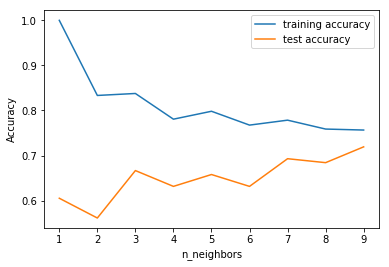

In [28]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,10)
for n_neighbors in neighbors_settings:
# build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(xtrain, ytrain)
# record training set accuracy
    training_accuracy.append(clf.score(xtrain, ytrain))
# record generalization accuracy
    test_accuracy.append(clf.score(xtest, ytest))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


knn=KNeighborsClassifier(n_neighbors=9)
st=time.time()
knn.fit(xtrain,ytrain)
test=knn.predict(xtest)
et=time.time()
time_knn=et-st
knn.score(xtrain,ytrain)
score_knn=accuracy_score(test,ytest)
accuracy_score(test,ytest)
print(classification_report(ytest,test)) 



# Logistic Regression

              precision    recall  f1-score   support

         0.0       0.60      0.27      0.37        33
         1.0       0.76      0.93      0.83        81

    accuracy                           0.74       114
   macro avg       0.68      0.60      0.60       114
weighted avg       0.71      0.74      0.70       114



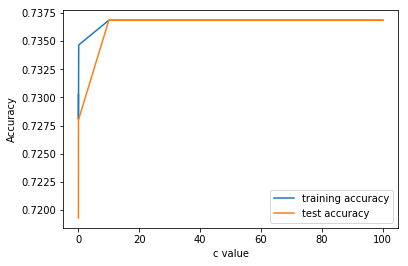

In [29]:
training_accuracy = []
test_accuracy = []
cvalue = [0.001,0.01,0.1,10,100]
for c in cvalue:
    log1=LogisticRegression(C=c,max_iter=10000,penalty='l2').fit(xtrain,ytrain)
    test=log1.predict(xtest)
    log1.score(xtrain,ytrain)
    accuracy_score(test,ytest)
    training_accuracy.append(log1.score(xtrain, ytrain))
    test_accuracy.append(log1.score(xtest, ytest))
plt.plot(cvalue, training_accuracy, label="training accuracy")
plt.plot(cvalue, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("c value")
plt.legend()

log1=LogisticRegression(C=100,max_iter=10000,random_state=25)
#rfe = RFE(log1, 9)
st=time.time()
log1=log1.fit(xtrain,ytrain)
test=log1.predict(xtest)
et=time.time()
time_log=et-st
#log1.score(xtrain,ytrain)
score_log=accuracy_score(test,ytest)
accuracy_score(test,ytest)
print(classification_report(ytest,test))



# Decision Tree

              precision    recall  f1-score   support

         0.0       0.43      0.48      0.46        33
         1.0       0.78      0.74      0.76        81

    accuracy                           0.67       114
   macro avg       0.61      0.61      0.61       114
weighted avg       0.68      0.67      0.67       114

[0.17020215 0.01723187 0.1627732  0.03883178 0.12594066 0.09227575
 0.15083654 0.1418408  0.06648601 0.03358124]


Text(0, 0.5, 'Feature')

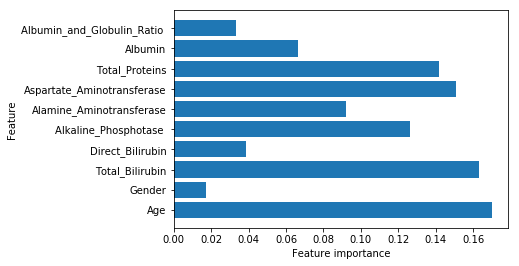

In [30]:
tree=DecisionTreeClassifier(criterion="gini",max_depth=30,random_state=50)
st=time.time()
tree.fit(xtrain,ytrain)
test=tree.predict(xtest)
et=time.time()
time_dt=et-st
tree.score(xtrain,ytrain)
accuracy_score(test,ytest)
score_dt=accuracy_score(test,ytest)
print(classification_report(ytest,test)) 
    
print(tree.feature_importances_)

plt.barh(range(10),tree.feature_importances_,align='center')
plt.yticks(np.arange(10),x.columns)
plt.xlabel('Feature importance')
plt.ylabel('Feature')



# Random Forest Tree

              precision    recall  f1-score   support

         0.0       0.57      0.39      0.46        33
         1.0       0.78      0.88      0.83        81

    accuracy                           0.74       114
   macro avg       0.67      0.64      0.64       114
weighted avg       0.72      0.74      0.72       114



Text(0, 0.5, 'Feature')

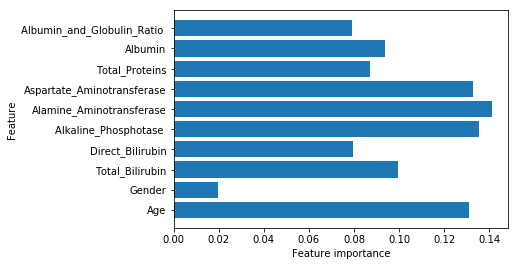

In [31]:
forest=RandomForestClassifier(n_estimators=100,max_depth=30,random_state=50)
st=time.time()
forest.fit(xtrain,ytrain)
test=forest.predict(xtest)
et=time.time()
time_rf=et-st
forest.score(xtrain,ytrain)
accuracy_score(test,ytest)
score_rf=accuracy_score(test,ytest)
print(classification_report(ytest,test)) 

plt.barh(range(10),forest.feature_importances_,align='center')
plt.yticks(np.arange(10),x.columns)
plt.xlabel('Feature importance')
plt.ylabel('Feature')



# Gradient Boosting Algorithm

              precision    recall  f1-score   support

         0.0       0.42      0.45      0.43        33
         1.0       0.77      0.74      0.75        81

    accuracy                           0.66       114
   macro avg       0.59      0.60      0.59       114
weighted avg       0.67      0.66      0.66       114



Text(0, 0.5, 'Feature')

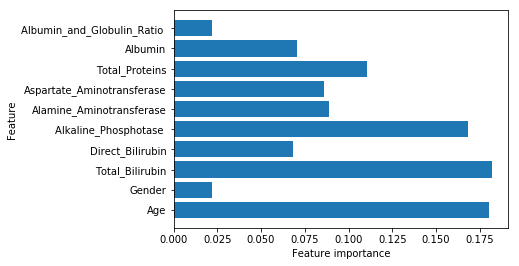

In [32]:
gradient=GradientBoostingClassifier(n_estimators=50,learning_rate=1,max_depth=30,random_state=50)
st=time.time()
gradient.fit(xtrain,ytrain)
test=gradient.predict(xtest)
et=time.time()
time_gba=et-st
gradient.score(xtrain,ytrain)
score_gba=accuracy_score(test,ytest)
accuracy_score(test,ytest)
print(classification_report(ytest,test)) 

plt.barh(range(10),gradient.feature_importances_,align='center')
plt.yticks(np.arange(10),x.columns)
plt.xlabel('Feature importance')
plt.ylabel('Feature')

# AdaBoost Algorithm

              precision    recall  f1-score   support

         0.0       0.41      0.27      0.33        33
         1.0       0.74      0.84      0.79        81

    accuracy                           0.68       114
   macro avg       0.57      0.56      0.56       114
weighted avg       0.64      0.68      0.65       114



Text(0, 0.5, 'Feature')

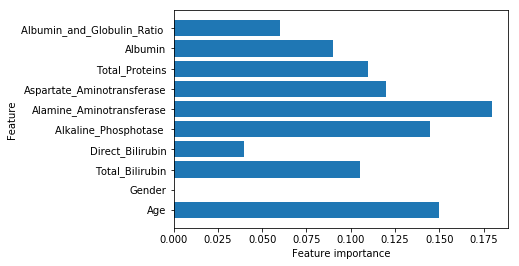

In [33]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=200,learning_rate=1,random_state=50)
st=time.time()
model.fit(xtrain, ytrain)
test=model.predict(xtest)
et=time.time()
time_ab=et-st
model.score(xtrain,ytrain)
score_ab=accuracy_score(test,ytest)
accuracy_score(test,ytest)
print(classification_report(ytest,test)) 

plt.barh(range(10),model.feature_importances_,align='center')
plt.yticks(np.arange(10),x.columns)
plt.xlabel('Feature importance')
plt.ylabel('Feature')


# XGBoost Algorithm

              precision    recall  f1-score   support

         0.0       0.48      0.36      0.41        33
         1.0       0.76      0.84      0.80        81

    accuracy                           0.70       114
   macro avg       0.62      0.60      0.61       114
weighted avg       0.68      0.70      0.69       114



Text(0, 0.5, 'Feature')

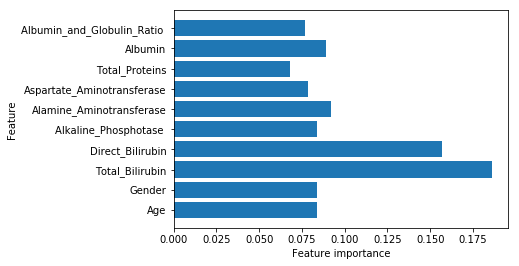

In [34]:
import xgboost as xgb
model=xgb.XGBClassifier(n_estimators=150,max_depth=30,random_state=50)
st=time.time()
model.fit(xtrain, ytrain)
test=model.predict(xtest)
et=time.time()
time_xgb=et-st
model.score(xtrain,ytrain)
accuracy_score(test,ytest)
score_xgb=accuracy_score(test,ytest)
print(classification_report(ytest,test)) 

plt.barh(range(10),model.feature_importances_,align='center')
plt.yticks(np.arange(10),x.columns)
plt.xlabel('Feature importance')
plt.ylabel('Feature')



# LightBGM

              precision    recall  f1-score   support

         0.0       0.48      0.48      0.48        33
         1.0       0.79      0.79      0.79        81

    accuracy                           0.70       114
   macro avg       0.64      0.64      0.64       114
weighted avg       0.70      0.70      0.70       114



Text(0, 0.5, 'Feature')

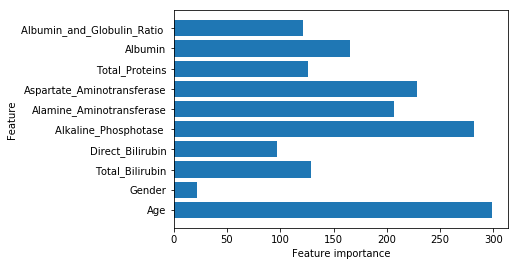

In [35]:
from lightgbm import LGBMClassifier
model=LGBMClassifier(n_estimators=100,max_depth=30,random_state=50)
st=time.time()
model.fit(xtrain, ytrain)
test=model.predict(xtest)
model.score(xtrain,ytrain)
et=time.time()
time_gbm=et-st
accuracy_score(test,ytest)
score_gbm=accuracy_score(test,ytest)
print(classification_report(ytest,test)) 

plt.barh(range(10),model.feature_importances_,align='center')
plt.yticks(np.arange(10),x.columns)
plt.xlabel('Feature importance')
plt.ylabel('Feature')



In [36]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from xgboost import XGBClassifier


features = X_samp
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, y_samp, random_state=None)

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=RandomForestClassifier(bootstrap=True, criterion="gini", max_features=0.8500000000000001, min_samples_leaf=17, min_samples_split=8, n_estimators=100)),
    StackingEstimator(estimator=SGDClassifier(alpha=0.01, eta0=0.01, fit_intercept=False, l1_ratio=0.75, learning_rate="constant", loss="hinge", penalty="elasticnet", power_t=0.1)),
    StackingEstimator(estimator=XGBClassifier(learning_rate=0.1, max_depth=8, min_child_weight=10, n_estimators=100, nthread=1, subsample=0.8500000000000001)),
    KNeighborsClassifier(n_neighbors=1, p=1, weights="distance")
)
st=time.time()
exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)
et=time.time()
time_stack1=et-st
score_stack=accuracy_score(testing_target,results)
print(classification_report(testing_target,results))



              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88       162
         1.0       0.92      0.68      0.78       108

    accuracy                           0.85       270
   macro avg       0.87      0.82      0.83       270
weighted avg       0.86      0.85      0.84       270



# STACKING ESTIMATOR

In [37]:
import time
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation='logistic',hidden_layer_sizes=(20, 2), max_iter=1500, alpha=1e-4,
                    solver='adam', verbose=10, tol=0.000001, random_state=50,
                    learning_rate_init=0.001,learning_rate='adaptive',momentum=0.8)
st=time.time()
mlp.fit(xtrain,ytrain)
print("Training set score: %f" % mlp.score(xtrain,ytrain))
test=mlp.predict(xtest)
et=time.time()
time_mlp=et-st
score_nn=accuracy_score(test,ytest)
print(accuracy_score(test,ytest))
#print("Test set score: %f" % mlp.score(learnset, learnlabels))
print(classification_report(ytest,test)) 




Iteration 1, loss = 0.96182725
Iteration 2, loss = 0.95627961
Iteration 3, loss = 0.95118763
Iteration 4, loss = 0.94637389
Iteration 5, loss = 0.94168127
Iteration 6, loss = 0.93743489
Iteration 7, loss = 0.93309984
Iteration 8, loss = 0.92895558
Iteration 9, loss = 0.92493668
Iteration 10, loss = 0.92101472
Iteration 11, loss = 0.91728477
Iteration 12, loss = 0.91356958
Iteration 13, loss = 0.90999556
Iteration 14, loss = 0.90649519
Iteration 15, loss = 0.90324798
Iteration 16, loss = 0.90027340
Iteration 17, loss = 0.89744865
Iteration 18, loss = 0.89500072
Iteration 19, loss = 0.89272200
Iteration 20, loss = 0.89042099
Iteration 21, loss = 0.88822873
Iteration 22, loss = 0.88605846
Iteration 23, loss = 0.88392471
Iteration 24, loss = 0.88178648
Iteration 25, loss = 0.87913517
Iteration 26, loss = 0.87653205
Iteration 27, loss = 0.87412391
Iteration 28, loss = 0.87194247
Iteration 29, loss = 0.86984000
Iteration 30, loss = 0.86778629
Iteration 31, loss = 0.86582181
Iteration 32, los

C:\Users\Maria\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Maria\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Maria\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# MLP

In [38]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import StandardScaler
from tpot.builtins import StackingEstimator

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
features = X_samp
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, y_samp, random_state=None)


# Average CV score on the training set was: 0.8808420607214641
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=SGDClassifier(alpha=0.0, eta0=1.0, fit_intercept=True, l1_ratio=1.0, learning_rate="invscaling", loss="log", penalty="elasticnet", power_t=1.0)),
    StackingEstimator(estimator=MultinomialNB(alpha=100.0, fit_prior=False)),
    StandardScaler(),
    GradientBoostingClassifier(learning_rate=0.5, max_depth=8, max_features=0.8500000000000001, min_samples_leaf=14, min_samples_split=14, n_estimators=100, subsample=0.9500000000000001)
)

st1=time.time()
exported_pipeline.fit(training_features,np.ravel(training_target,order='C'))
results = exported_pipeline.predict(testing_features)
et1=time.time()
time_se1=et1-st1
score_stack1=accuracy_score(testing_target,results)
print(classification_report(testing_target,results))


              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87       161
         1.0       0.85      0.70      0.77       109

    accuracy                           0.83       270
   macro avg       0.84      0.81      0.82       270
weighted avg       0.83      0.83      0.83       270



In [39]:

scores = [score_nn,score_knn,score_log,score_dt,score_rf,score_gba,score_ab,score_xgb,score_gbm,score_stack,score_stack1]
algorithms = ["Neural Networks","KNN","Logistic Regression","Decision Tree","Random Forest Tree","Gradient Boosting Algorithm","Ada Boosting","XGBoost","LightGBM","Stacking Estimator1","Stacking Estimator2"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Neural Networks is: 0.7105263157894737 %
The accuracy score achieved using KNN is: 0.7192982456140351 %
The accuracy score achieved using Logistic Regression is: 0.7368421052631579 %
The accuracy score achieved using Decision Tree is: 0.6666666666666666 %
The accuracy score achieved using Random Forest Tree is: 0.7368421052631579 %
The accuracy score achieved using Gradient Boosting Algorithm is: 0.6578947368421053 %
The accuracy score achieved using Ada Boosting is: 0.6754385964912281 %
The accuracy score achieved using XGBoost is: 0.7017543859649122 %
The accuracy score achieved using LightGBM is: 0.7017543859649122 %
The accuracy score achieved using Stacking Estimator1 is: 0.8481481481481481 %
The accuracy score achieved using Stacking Estimator2 is: 0.8296296296296296 %


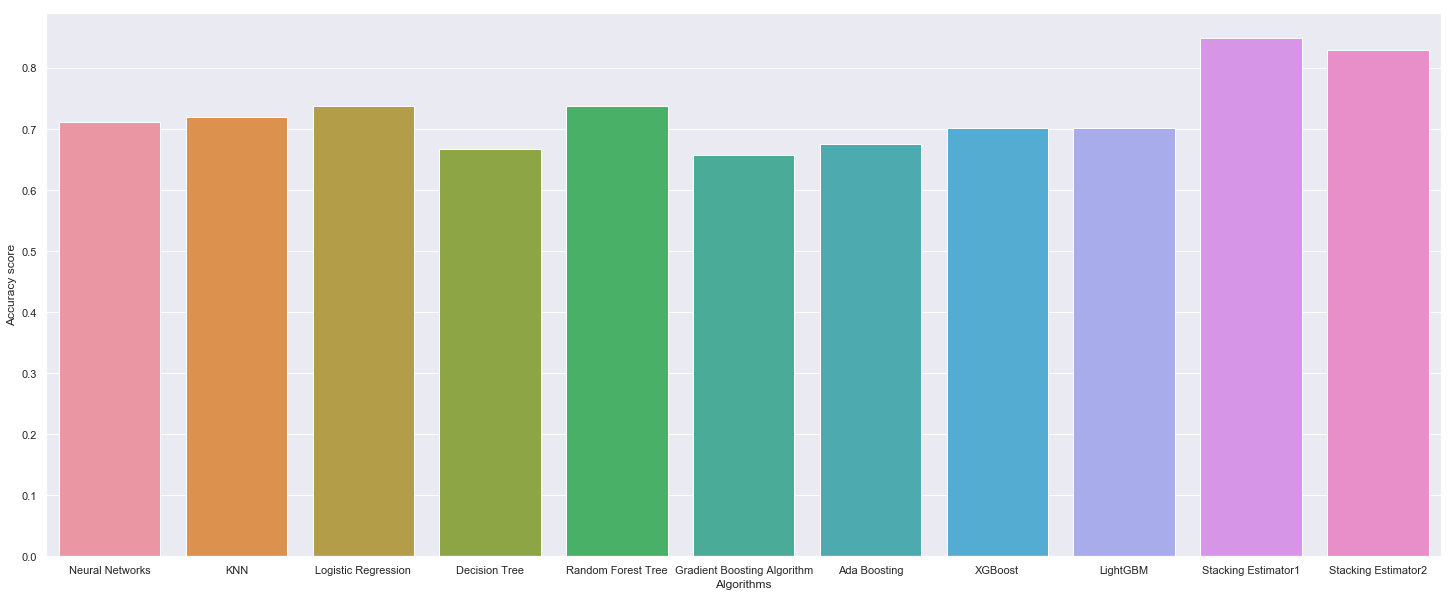

In [40]:
sns.set(rc={'figure.figsize':(25,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [41]:

scores = [time_mlp,time_knn,time_log,time_dt,time_rf,time_gba,time_ab,time_xgb,time_gbm,time_stack1,time_se1]
algorithms = ["Neural Networks","KNN","Logistic Regression","Decision Tree","Random Forest Tree","Gradient Boosting Algorithm","Ada Boosting","XGBoost","LightGBM","Stacking Estimator1","Stacking Estimator2"]    

for i in range(len(algorithms)):
    print("The time taken "+algorithms[i]+" is: "+str(scores[i]))

The time taken Neural Networks is: 2.2439980506896973
The time taken KNN is: 0.007978677749633789
The time taken Logistic Regression is: 0.18450570106506348
The time taken Decision Tree is: 0.00798177719116211
The time taken Random Forest Tree is: 0.25032877922058105
The time taken Gradient Boosting Algorithm is: 0.05684852600097656
The time taken Ada Boosting is: 0.39098334312438965
The time taken XGBoost is: 0.19148826599121094
The time taken LightGBM is: 0.06382942199707031
The time taken Stacking Estimator1 is: 0.5226020812988281
The time taken Stacking Estimator2 is: 0.388958215713501


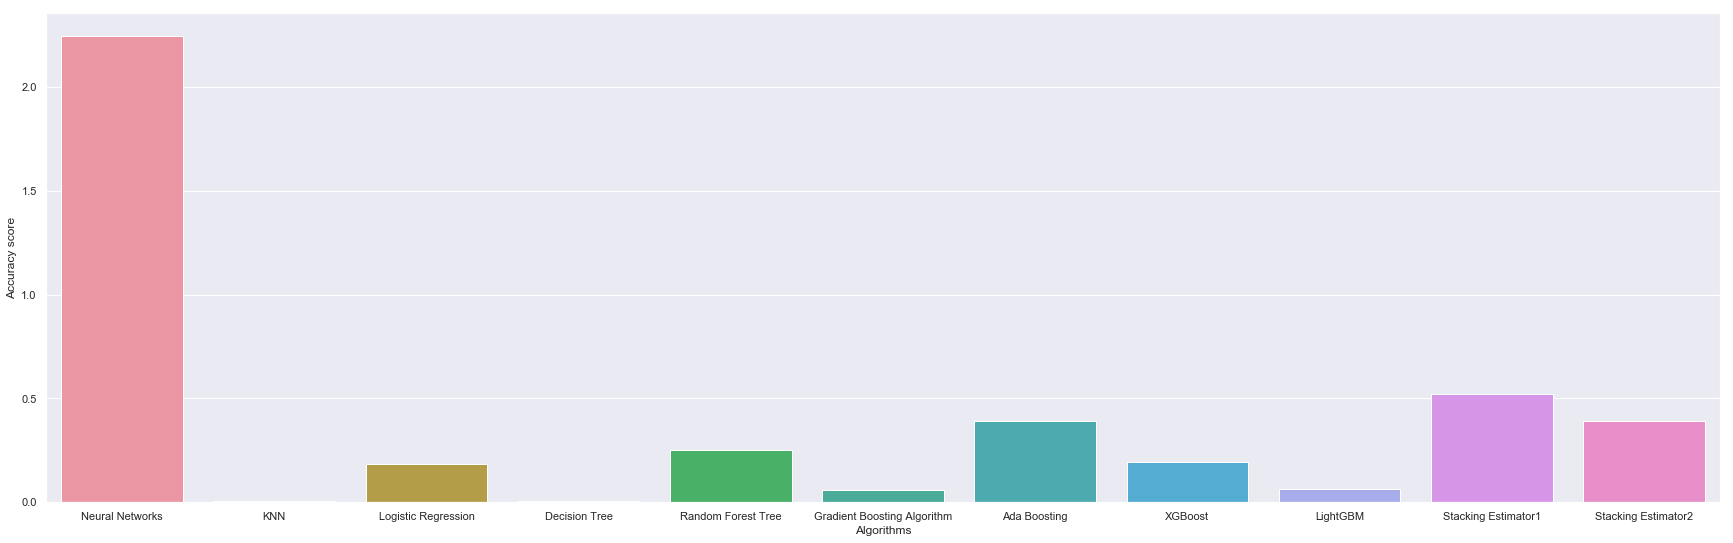

In [42]:
sns.set(rc={'figure.figsize':(30,9)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

# AFTER OUTLIER REMOVAL

In [77]:
x1=X
y1=Y

xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.20,random_state=50)

# MLP

In [78]:
import time

In [79]:

from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(activation='logistic',hidden_layer_sizes=(20, 2), max_iter=1500, alpha=1e-4,
                    solver='adam', verbose=10, tol=0.000001, random_state=50,
                    learning_rate_init=0.001,learning_rate='adaptive',momentum=0.8)

mlp.fit(xtrain,np.ravel(ytrain,order='C'))
print("Training set score: %f" % mlp.score(xtrain,ytrain))
st=time.time()
test=mlp.predict(xtest)
et=time.time()
time_mlp=et-st
score_nn=accuracy_score(test,ytest)
print(accuracy_score(test,ytest))
#print("Test set score: %f" % mlp.score(learnset, learnlabels))
print(classification_report(ytest,test)) 


Iteration 1, loss = 0.60294756
Iteration 2, loss = 0.60198712
Iteration 3, loss = 0.60118839
Iteration 4, loss = 0.60049458
Iteration 5, loss = 0.59983431
Iteration 6, loss = 0.59931893
Iteration 7, loss = 0.59874363
Iteration 8, loss = 0.59850419
Iteration 9, loss = 0.59804718
Iteration 10, loss = 0.59776696
Iteration 11, loss = 0.59751931
Iteration 12, loss = 0.59717990
Iteration 13, loss = 0.59695983
Iteration 14, loss = 0.59663198
Iteration 15, loss = 0.59640791
Iteration 16, loss = 0.59618185
Iteration 17, loss = 0.59598549
Iteration 18, loss = 0.59579825
Iteration 19, loss = 0.59573446
Iteration 20, loss = 0.59555757
Iteration 21, loss = 0.59546072
Iteration 22, loss = 0.59532740
Iteration 23, loss = 0.59520866
Iteration 24, loss = 0.59510060
Iteration 25, loss = 0.59497297
Iteration 26, loss = 0.59482351
Iteration 27, loss = 0.59466958
Iteration 28, loss = 0.59462400
Iteration 29, loss = 0.59444606
Iteration 30, loss = 0.59432109
Iteration 31, loss = 0.59425661
Iteration 32, los

#### Confusion Matrix

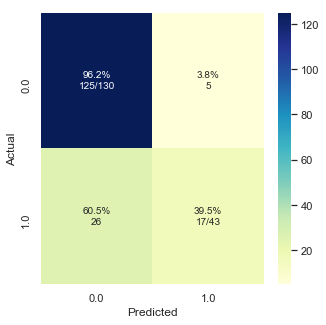

In [80]:
plot_cm(ytest,test)

#### ROC Curve

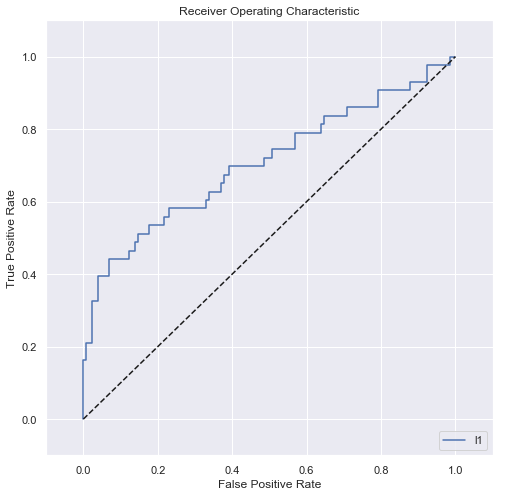

In [81]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
y_pred_proba = mlp.predict_proba(xtest)[:,1]
fpr, tpr, thresholds = roc_curve(ytest,y_pred_proba)
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# KNN 

              precision    recall  f1-score   support

         0.0       0.79      0.97      0.87       130
         1.0       0.71      0.23      0.35        43

    accuracy                           0.79       173
   macro avg       0.75      0.60      0.61       173
weighted avg       0.77      0.79      0.74       173



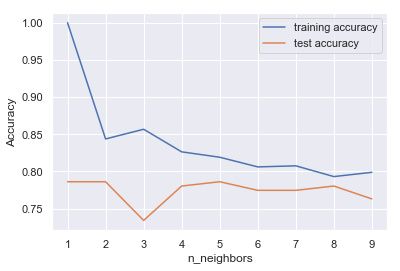

In [82]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,10)
for n_neighbors in neighbors_settings:
# build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(xtrain,np.ravel(ytrain,order='C'))
# record training set accuracy
    training_accuracy.append(clf.score(xtrain, ytrain))
# record generalization accuracy
    test_accuracy.append(clf.score(xtest, ytest))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(xtrain,np.ravel(ytrain,order='C'))
st=time.time()
test=knn.predict(xtest)
et=time.time()
time_knn=et-st
score_knn=accuracy_score(test,ytest)
knn.score(xtrain,ytrain)
accuracy_score(test,ytest)
print(classification_report(ytest,test)) 


#### ROC Curve

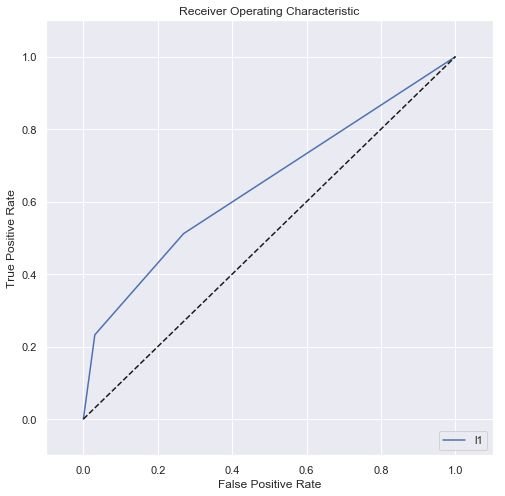

In [84]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
y_pred_proba = knn.predict_proba(xtest)[:,1]
fpr, tpr, thresholds = roc_curve(ytest,y_pred_proba)
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Logistic Regression

              precision    recall  f1-score   support

         0.0       0.78      0.94      0.85       130
         1.0       0.53      0.21      0.30        43

    accuracy                           0.76       173
   macro avg       0.66      0.57      0.58       173
weighted avg       0.72      0.76      0.72       173



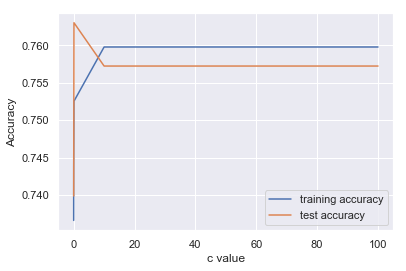

In [86]:
training_accuracy = []
test_accuracy = []
cvalue = [0.001,0.01,0.1,10,100]
for c in cvalue:
    log1=LogisticRegression(C=c,max_iter=10000,penalty='l2').fit(xtrain,np.ravel(ytrain,order='C'))
    test=log1.predict(xtest)
    log1.score(xtrain,ytrain)
    accuracy_score(test,ytest)
    training_accuracy.append(log1.score(xtrain, ytrain))
    test_accuracy.append(log1.score(xtest, ytest))
plt.plot(cvalue, training_accuracy, label="training accuracy")
plt.plot(cvalue, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("c value")
plt.legend()

log1=LogisticRegression(C=1,max_iter=10000,random_state=25)
#rfe = RFE(log1, 9)
log1=log1.fit(xtrain,np.ravel(ytrain,order='C'))
st=time.time()
test=log1.predict(xtest)
et=time.time()
time_log=et-st
score_log=accuracy_score(test,ytest)
#log1.score(xtrain,ytrain)
accuracy_score(test,ytest)
print(classification_report(ytest,test)) 



#### Confusion Matrix

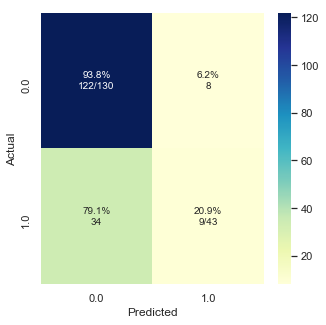

In [87]:
plot_cm(ytest,test)

#### ROC Curve

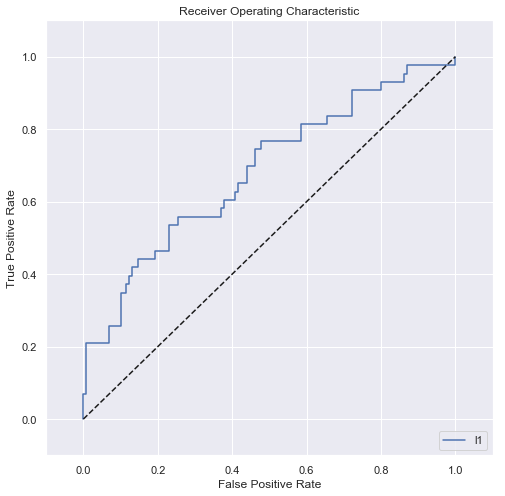

In [88]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
y_pred_proba = log1.predict_proba(xtest)[:,1]
fpr, tpr, thresholds = roc_curve(ytest,y_pred_proba)
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Decision Tree

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89       130
         1.0       0.67      0.67      0.67        43

    accuracy                           0.84       173
   macro avg       0.78      0.78      0.78       173
weighted avg       0.84      0.84      0.84       173



Text(0, 0.5, 'Feature')

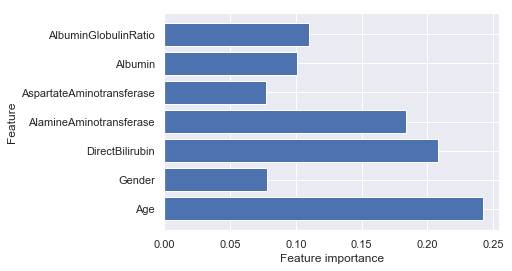

In [89]:
tree=DecisionTreeClassifier(criterion="gini",max_depth=30,random_state=50)
tree.fit(xtrain,ytrain)
st=time.time()
test=tree.predict(xtest)
et=time.time()
time_dt=et-st
tree.score(xtrain,ytrain)
accuracy_score(test,ytest)
score_dt=accuracy_score(test,ytest)
print(classification_report(ytest,test)) 
    
plt.barh(range(7),tree.feature_importances_,align='center')
plt.yticks(np.arange(7),X.columns)
plt.xlabel('Feature importance')
plt.ylabel('Feature')


#### Confusion Matrix

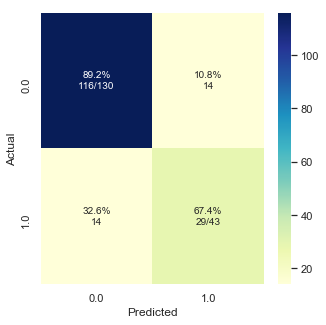

In [90]:
plot_cm(ytest,test)

#### ROC Curve

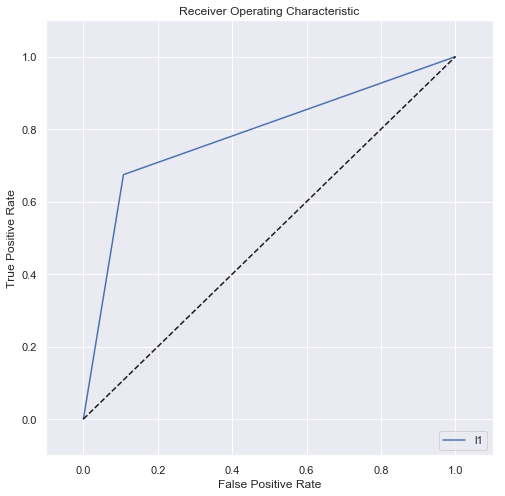

In [91]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
y_pred_proba = tree.predict_proba(xtest)[:,1]
fpr, tpr, thresholds = roc_curve(ytest,y_pred_proba)
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest Tree

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93       130
         1.0       0.83      0.67      0.74        43

    accuracy                           0.88       173
   macro avg       0.86      0.81      0.83       173
weighted avg       0.88      0.88      0.88       173



Text(0, 0.5, 'Feature')

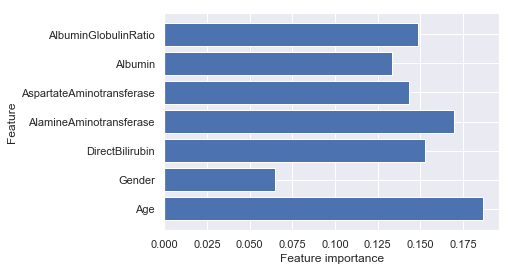

In [92]:
forest=RandomForestClassifier(n_estimators=100,max_depth=30,random_state=50)
forest.fit(xtrain,np.ravel(ytrain,order='C'))
st=time.time()
test=forest.predict(xtest)
et=time.time()
time_rf=et-st
forest.score(xtrain,ytrain)
score_rf=accuracy_score(test,ytest)
accuracy_score(test,ytest)
print(classification_report(ytest,test)) 

plt.barh(range(7),forest.feature_importances_,align='center')
plt.yticks(np.arange(7),X.columns)
plt.xlabel('Feature importance')
plt.ylabel('Feature')


#### Confusion Matrix

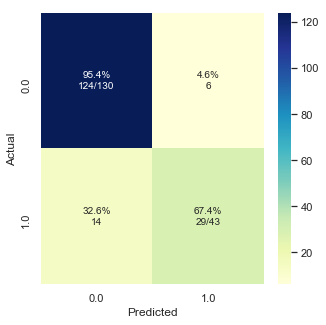

In [93]:
plot_cm(ytest,test)

#### ROC Curve

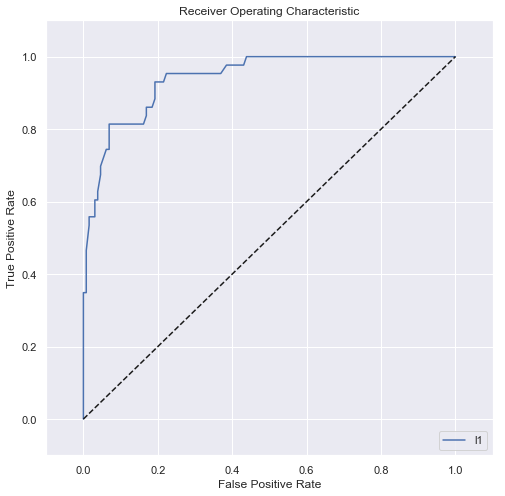

In [94]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
y_pred_proba = forest.predict_proba(xtest)[:,1]
fpr, tpr, thresholds = roc_curve(ytest,y_pred_proba)
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Gradient Boosting Algorithm

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89       130
         1.0       0.67      0.67      0.67        43

    accuracy                           0.84       173
   macro avg       0.78      0.78      0.78       173
weighted avg       0.84      0.84      0.84       173



Text(0, 0.5, 'Feature')

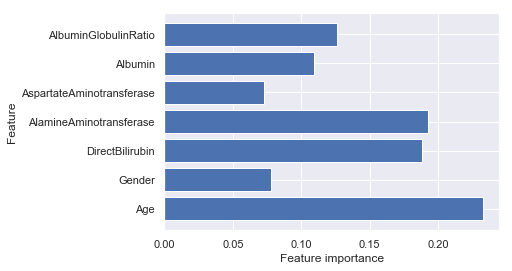

In [95]:
gradient=GradientBoostingClassifier(n_estimators=50,learning_rate=1,max_depth=30,random_state=50)
gradient.fit(xtrain,np.ravel(ytrain,order='C'))
st=time.time()
test=gradient.predict(xtest)
et=time.time()
time_gba=et-st
gradient.score(xtrain,ytrain)
score_gba=accuracy_score(test,ytest)
accuracy_score(test,ytest)
print(classification_report(ytest,test)) 


plt.barh(range(7),gradient.feature_importances_,align='center')
plt.yticks(np.arange(7),X.columns)
plt.xlabel('Feature importance')
plt.ylabel('Feature')

#### Confusion Matrix

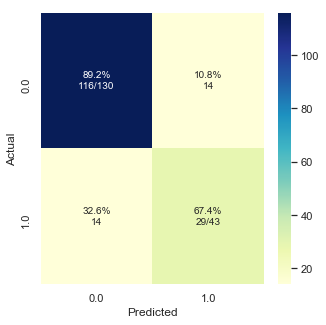

In [96]:
plot_cm(ytest,test)

#### ROC Curve

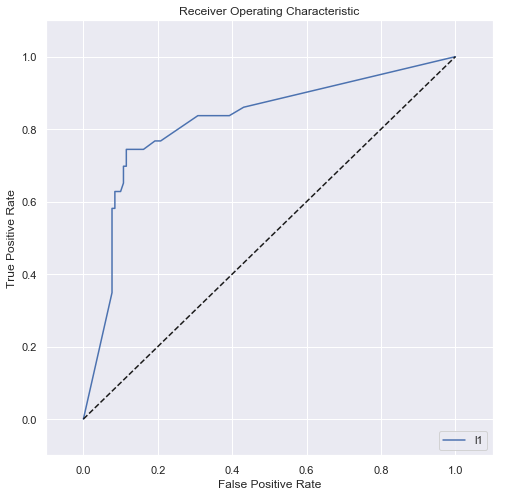

In [97]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
y_pred_proba = gradient.predict_proba(xtest)[:,1]
fpr, tpr, thresholds = roc_curve(ytest,y_pred_proba)
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AdaBoost

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       130
         1.0       0.68      0.63      0.65        43

    accuracy                           0.83       173
   macro avg       0.78      0.76      0.77       173
weighted avg       0.83      0.83      0.83       173



Text(0, 0.5, 'Feature')

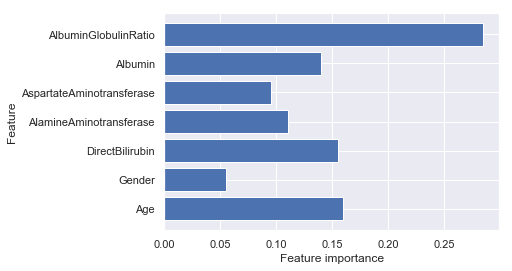

In [98]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=200,learning_rate=1,random_state=50)
model.fit(xtrain, np.ravel(ytrain,order='C'))
st=time.time()
test=model.predict(xtest)
et=time.time()
time_ab=et-st
model.score(xtrain,ytrain)
score_ab=accuracy_score(test,ytest)
accuracy_score(test,ytest)
print(classification_report(ytest,test)) 

plt.barh(range(7),model.feature_importances_,align='center')
plt.yticks(np.arange(7),X.columns)
plt.xlabel('Feature importance')
plt.ylabel('Feature')


#### Confusion Matrix

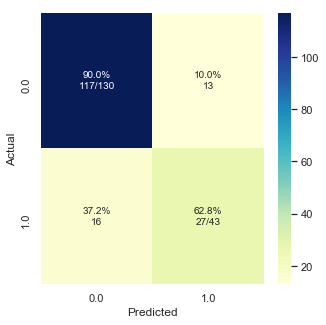

In [99]:
plot_cm(ytest,test)

#### ROC Curve

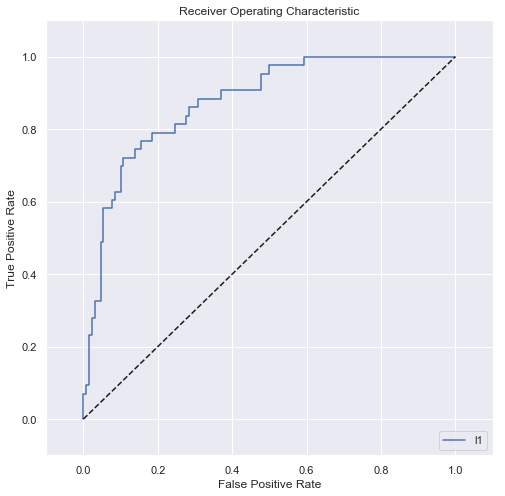

In [100]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
y_pred_proba = model.predict_proba(xtest)[:,1]
fpr, tpr, thresholds = roc_curve(ytest,y_pred_proba)
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# XGBoost

              precision    recall  f1-score   support

         0.0       0.91      0.90      0.91       130
         1.0       0.71      0.74      0.73        43

    accuracy                           0.86       173
   macro avg       0.81      0.82      0.82       173
weighted avg       0.86      0.86      0.86       173



Text(0, 0.5, 'Feature')

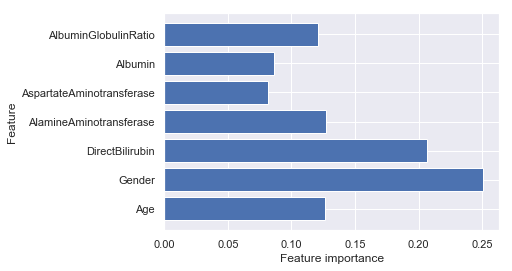

In [101]:
import xgboost as xgb
model=xgb.XGBClassifier(n_estimators=150,max_depth=30,random_state=50)
model.fit(xtrain,np.ravel(ytrain,order='C'))
st=time.time()
test=model.predict(xtest)
et=time.time()
time_xg=et-st
model.score(xtrain,ytrain)
score_xg=accuracy_score(test,ytest)
accuracy_score(test,ytest)
print(classification_report(ytest,test)) 

plt.barh(range(7),model.feature_importances_,align='center')
plt.yticks(np.arange(7),X.columns)
plt.xlabel('Feature importance')
plt.ylabel('Feature')


#### Confusion Matrix

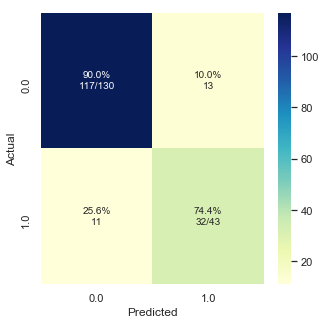

In [102]:
plot_cm(ytest,test)

#### ROC Curve

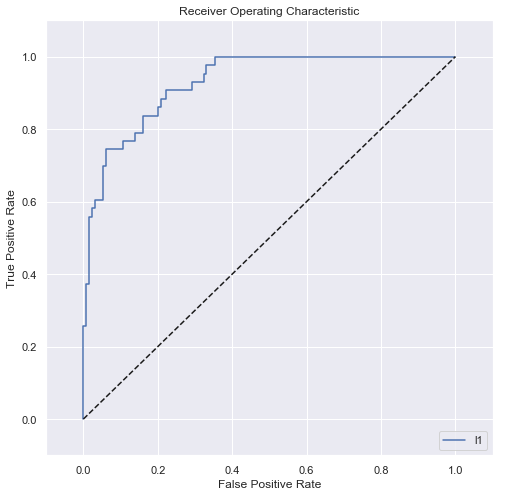

In [103]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
y_pred_proba = model.predict_proba(xtest)[:,1]
fpr, tpr, thresholds = roc_curve(ytest,y_pred_proba)
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# LightGBM

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90       130
         1.0       0.71      0.70      0.71        43

    accuracy                           0.86       173
   macro avg       0.81      0.80      0.81       173
weighted avg       0.85      0.86      0.85       173



Text(0, 0.5, 'Feature')

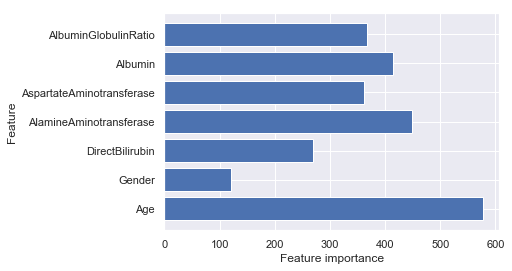

In [104]:

from lightgbm import LGBMClassifier
model=LGBMClassifier(n_estimators=100,max_depth=30,random_state=50)
model.fit(xtrain,  np.ravel(ytrain,order='C'))
st=time.time()
test=model.predict(xtest)
et=time.time()
time_gbm=et-st
model.score(xtrain,ytrain)
score_gbm=accuracy_score(test,ytest)
accuracy_score(test,ytest)
print(classification_report(ytest,test)) 
plt.barh(range(7),model.feature_importances_,align='center')
plt.yticks(np.arange(7),X.columns)
plt.xlabel('Feature importance')
plt.ylabel('Feature')


#### Confusion Matrix

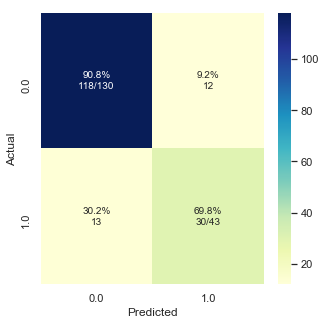

In [105]:
plot_cm(ytest,test)

#### ROC Curve

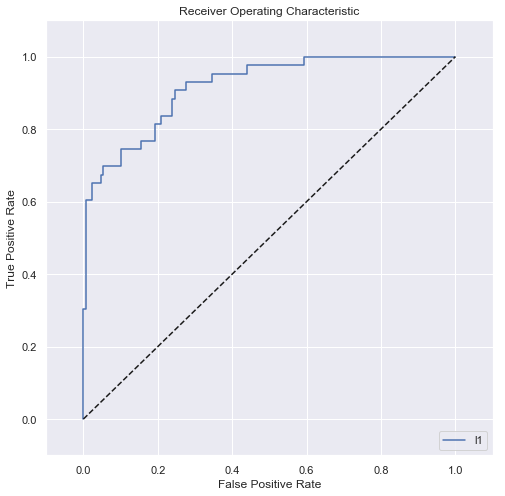

In [106]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
y_pred_proba = model.predict_proba(xtest)[:,1]
fpr, tpr, thresholds = roc_curve(ytest,y_pred_proba)
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Stacking Estimator

In [107]:
import numpy as np
import time
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from xgboost import XGBClassifier

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
#tpot_data = data
features = X
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, Y, random_state=None)

# Average CV score on the training set was: 0.9528735632183908
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=RandomForestClassifier(bootstrap=True, criterion="gini", max_features=0.8500000000000001, min_samples_leaf=17, min_samples_split=8, n_estimators=100)),
    StackingEstimator(estimator=SGDClassifier(alpha=0.01, eta0=0.01, fit_intercept=False, l1_ratio=0.75, learning_rate="constant", loss="hinge", penalty="elasticnet", power_t=0.1)),
    StackingEstimator(estimator=XGBClassifier(learning_rate=0.1, max_depth=8, min_child_weight=10, n_estimators=100, nthread=1, subsample=0.8500000000000001)),
    KNeighborsClassifier(n_neighbors=1, p=1, weights="distance")
)
st=time.time()
exported_pipeline.fit(training_features, np.ravel(training_target,order='C'))
results = exported_pipeline.predict(testing_features)
et=time.time()
time_se=et-st
score_stack=accuracy_score(testing_target,results)
print(classification_report(testing_target,results))

              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88       159
         1.0       0.71      0.47      0.57        57

    accuracy                           0.81       216
   macro avg       0.77      0.70      0.72       216
weighted avg       0.80      0.81      0.80       216



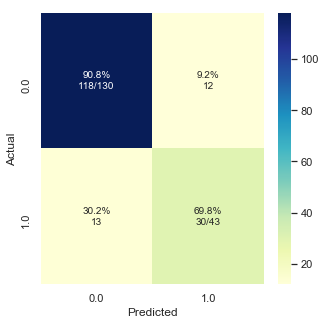

In [108]:
plot_cm(ytest,test)

In [119]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import StandardScaler
from tpot.builtins import StackingEstimator

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
features = X
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, Y, random_state=None)


# Average CV score on the training set was: 0.8808420607214641
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=SGDClassifier(alpha=0.0, eta0=1.0, fit_intercept=True, l1_ratio=1.0, learning_rate="invscaling", loss="log", penalty="elasticnet", power_t=1.0)),
    StackingEstimator(estimator=MultinomialNB(alpha=100.0, fit_prior=False)),
    StandardScaler(),
    GradientBoostingClassifier(learning_rate=0.5, max_depth=8, max_features=0.8500000000000001, min_samples_leaf=14, min_samples_split=14, n_estimators=100, subsample=0.9500000000000001)
)

st1=time.time()
exported_pipeline.fit(training_features,np.ravel(training_target,order='C'))
results = exported_pipeline.predict(testing_features)
et1=time.time()
time_se1=et1-st1
score_stack1=accuracy_score(testing_target,results)
print(classification_report(testing_target,results))


              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       154
         1.0       0.80      0.65      0.71        62

    accuracy                           0.85       216
   macro avg       0.83      0.79      0.81       216
weighted avg       0.85      0.85      0.85       216



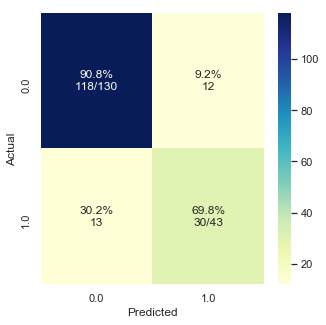

In [120]:
plot_cm(ytest,test)

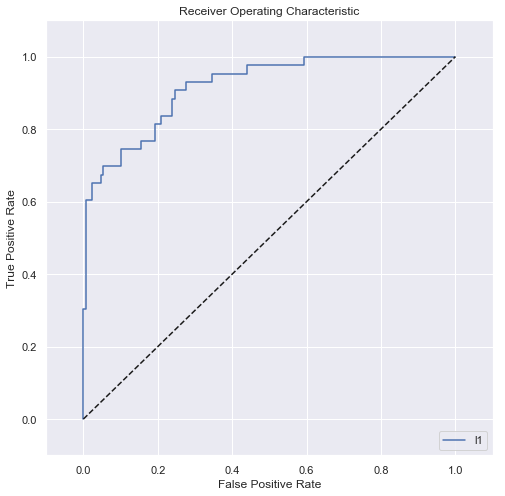

In [121]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
y_pred_proba = model.predict_proba(xtest)[:,1]
fpr, tpr, thresholds = roc_curve(ytest,y_pred_proba)
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [122]:

scores = [score_nn,score_knn,score_log,score_dt,score_rf,score_gba,score_ab,score_xg,score_gbm,score_stack,score_stack1]
algorithms = ["Neural Networks","KNN","Logistic Regression","Decision Tree","Random Forest Tree","Gradient Boosting","Ada Boosting","XGBoost","LightGBM","Stacking Estimator1","Stacking Estimator2"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Neural Networks is: 0.8208092485549133 %
The accuracy score achieved using KNN is: 0.7861271676300579 %
The accuracy score achieved using Logistic Regression is: 0.7572254335260116 %
The accuracy score achieved using Decision Tree is: 0.838150289017341 %
The accuracy score achieved using Random Forest Tree is: 0.884393063583815 %
The accuracy score achieved using Gradient Boosting is: 0.838150289017341 %
The accuracy score achieved using Ada Boosting is: 0.8323699421965318 %
The accuracy score achieved using XGBoost is: 0.861271676300578 %
The accuracy score achieved using LightGBM is: 0.8554913294797688 %
The accuracy score achieved using Stacking Estimator1 is: 0.8101851851851852 %
The accuracy score achieved using Stacking Estimator2 is: 0.8518518518518519 %


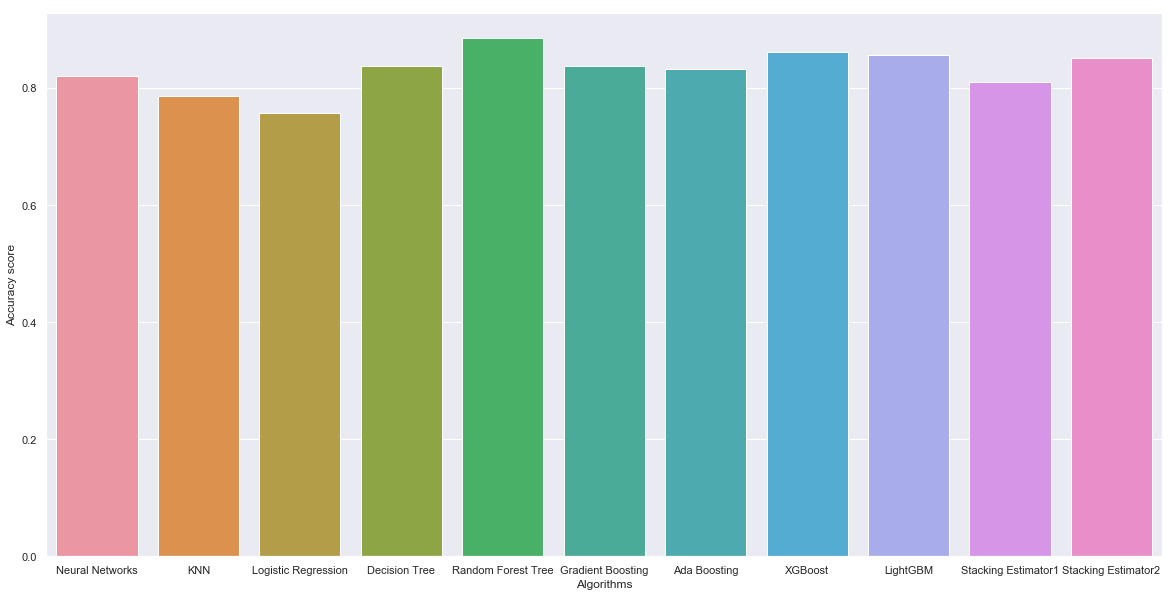

In [123]:
sns.set(rc={'figure.figsize':(20,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [124]:

scores = [time_mlp,time_knn,time_log,time_dt,time_rf,time_gba,time_ab,time_xgb,time_gbm,time_se,time_se1]
algorithms = ["Neural Networks","KNN","Logistic Regression","Decision Tree","Random Forest Tree","Gradient Boosting ","Ada Boosting","XGBoost","LightGBM","Stacking Estimator 1","Stacking Estimator 2"]    

for i in range(len(algorithms)):
    print("The time score taken "+algorithms[i]+" is: "+str(scores[i]))

The time score taken Neural Networks is: 0.000997304916381836
The time score taken KNN is: 0.006978273391723633
The time score taken Logistic Regression is: 0.0009975433349609375
The time score taken Decision Tree is: 0.0009982585906982422
The time score taken Random Forest Tree is: 0.010970354080200195
The time score taken Gradient Boosting  is: 0.001994609832763672
The time score taken Ada Boosting is: 0.028922319412231445
The time score taken XGBoost is: 0.19148826599121094
The time score taken LightGBM is: 0.00599360466003418
The time score taken Stacking Estimator 1 is: 0.36003589630126953
The time score taken Stacking Estimator 2 is: 0.3640255928039551


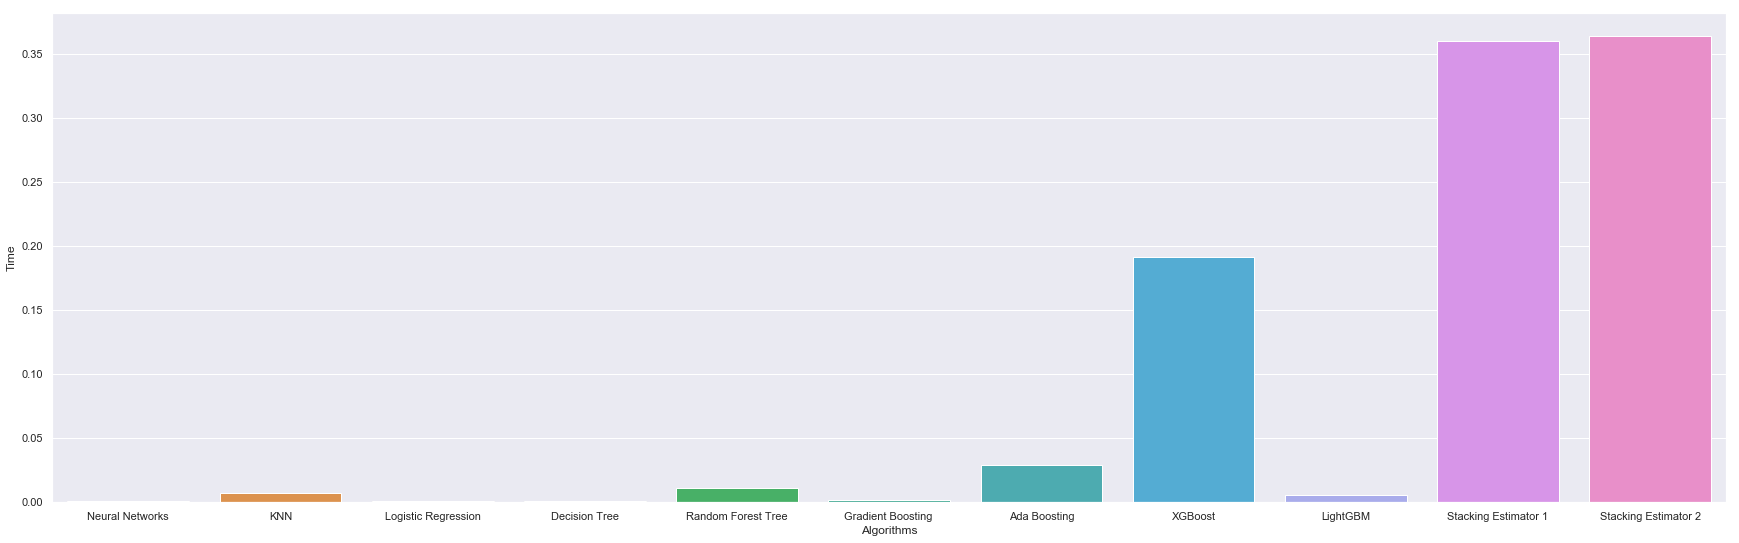

In [126]:
sns.set(rc={'figure.figsize':(30,9)})
plt.xlabel("Algorithms")
plt.ylabel("Time")

sns.barplot(algorithms,scores)

# TPOT

In [122]:
datan=pd.DataFrame(X)
datan['Output']=Y

In [123]:
from sklearn.model_selection import train_test_split
training_indices, validation_indices = train_test_split(datan.index,train_size=0.80)
training_indices, testing_indices = train_test_split(datan.index,train_size=0.80)

In [ ]:
from tpot import TPOTClassifier
from tpot import TPOTRegressor

tpot = TPOTClassifier(generations=100,population_size=100,verbosity=2,scoring='accuracy',random_state=None)

tpot.fit(x1,np.ravel(y1,order='C'))


Generation 1 - Current best internal CV score: 0.8053175574595404
Generation 2 - Current best internal CV score: 0.8053175574595404
Generation 3 - Current best internal CV score: 0.8146470828233374
Generation 4 - Current best internal CV score: 0.8157486740106078
Generation 5 - Current best internal CV score: 0.8157486740106078
Generation 6 - Current best internal CV score: 0.8157894736842104
Generation 7 - Current best internal CV score: 0.8227730178158575
Generation 8 - Current best internal CV score: 0.8227730178158575
Generation 9 - Current best internal CV score: 0.8262681898544812
Generation 10 - Current best internal CV score: 0.8262681898544812
Generation 11 - Current best internal CV score: 0.8262681898544812
Generation 12 - Current best internal CV score: 0.8262681898544812
Generation 13 - Current best internal CV score: 0.8262681898544812
Generation 14 - Current best internal CV score: 0.8262681898544812
Generation 15 - Current best internal CV score: 0.8262681898544812
Gene